# 교보문고 책 추천시스템 구현 프로젝트

* 데이터 수집 링크 : http://www.kyobobook.co.kr/index.laf?OV_REFFER=https://www.google.com/
* CBF 사용 서적 : 연금술사 (변경 실행 가능)
* CF / MF 사용 계정 : 00**aith (변경 실행 가능)

# 데이터수집

In [2]:
# 크롤링 및 추천시스템 위한 라이브러리 호출
import pandas as pd  
import numpy as np   

import requests
from bs4 import BeautifulSoup    
from selenium import webdriver   
from selenium.webdriver.common.keys import Keys
import chromedriver_autoinstaller 

import time    
import re
import math
from tqdm import tqdm_notebook

# 데이터분석 위한 라이브러리 호출

import nltk
from konlpy.tag import Okt

# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/HMFMMUEX.ttc").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
matplotlib.rcParams['axes.unicode_minus'] = False

from collections import Counter

import warnings
warnings.filterwarnings('ignore')


In [2]:
pwd

'C:\\Users\\insoo\\Desktop\\Untitled Folder\\crawler\\gyobo'

In [3]:
# 상품페이지 URL 이동을 위한 제품 바코드 확인
df = pd.read_excel('kyobo_best_all.xlsx') # 교보문고 분야별 베스트셀러
df

,순위,바코드,도서명,저자명,출판사명,출간일,정가,카테고리,담당자
0,101,9791190641159,첫 번째 디자인 케이크,지은혜(아이라이크케이크),책밥,20200820,16000,요리,1
1,79,9788982814471,연금술사,파울로 코엘료,문학동네,20181205,12000,소설,1
2,138,9791189727451,기계설비 표준품셈(2022)(CD1장포함)(양장본 HardCover),건설연구원,건설연구원,20220114,34000,기술/공학,1
3,115,9791167900791,그때 그 마음(2022 제67회 현대문학상 수상소설집),정소현 외,현대문학,20211210,15000,소설,1
4,89,9791165343842,대한민국 금기 깨기,김동연,쌤앤파커스,20210728,17000,정치사회,1
...,...,...,...,...,...,...,...,...,...
4596,128,9791136292360,하이큐!! 컴플리트 일러스트레이션 북 끝과 시작,Haruichi Furudate,대원씨아이,20220119,40000,만화,5
4597,114,9788994521626,TOEFL Junior Test RC: Intermediate(Preparation...,CDL ESL Content RD Division,LEARN21,20110901,15500,외국어,5
4598,61,9788920011122,"현대일본정치의이해(2학기, 워크북포함)",강상규,한국방송통신대학교출판문화원,20130725,17600,방송통신대교재,5
4599,19,9791134855475,귀멸의 칼날. 17,고토게 코요하루,학산문화사,20200425,5000,만화,5


In [7]:
df = df[df['담당자']==4] # 담당자 변경
df.reset_index(drop=True, inplace= True) #인덱스 정렬
df

,순위,바코드,도서명,저자명,출판사명,출간일,정가,카테고리,담당자
0,95,9788926159156,최상위 수학 S 초등 3-1(2021),디딤돌 편집부,디딤돌,20201001,15000,초등참고서,4
1,4,9791190826839,오십에 읽는 논어,최종엽,유노북스,20211103,16000,인문,4
2,65,9791161502199,기적의 말하기 영단어 1000(무료 MP3 파일),이시원,시원스쿨닷컴,20190212,9000,외국어,4
3,39,9791191825084,기묘한 미술관,진병관,빅피시,20210908,17800,청소년,4
4,115,9788977991033,건축기술지침 Rev. 2: 건축1,대한건축학회,공간예술사,20170610,38000,기술/공학,4
...,...,...,...,...,...,...,...,...,...
915,140,9788934996361,세계는 왜 싸우는가,김영미,김영사,20190715,14800,정치사회,4
916,51,9791190665629,실무에 바로 쓰는 일잘러의 보고서 작성법,김마라,제이펍,20201117,18000,컴퓨터,4
917,16,9791191043150,나는 나답게 살기로 했다,손힘찬,스튜디오오드리,20210208,13500,인문,4
918,149,9791190670821,2022 렛유인 GSAT 삼성직무적성검사 독학단기완성,정지성,렛유인,20211230,23000,취업/수험서,4


In [8]:
# 크롤링 위한 데이터프레임 만들기
df_keyword = pd.DataFrame( columns=['id', 'klover','comment','keyword','score','total','title'])
df_keyword

,id,klover,comment,keyword,score,total,title


In [9]:
## 크롤링 전처리
def preprocessing(total):
    k_total = int(re.sub('\D','',total))
    return k_total

def keyword_pre(keywords):
    for keyword in keywords:
        keyword_list.append(keyword.text)

def id_pre(ids):
    for id in ids:
        id_list.append(id.text)
        
def klovers_pre(klovers):
    for klover in klovers:
        klover_list.append(klover.text)
        
def comments_pre(comments):
    for comment in comments:
        comment_list.append(comment.text)

## 전체 리뷰 데이터수집

In [ ]:
for j in tqdm_notebook(range(41, 120)):
    url = df.iloc[j][1]
    title = df['도서명'][j]

# 크롬 웹 브라우저 실행 (keyword 검색결과)

    chrome_path = chromedriver_autoinstaller.install()
    driver = webdriver.Chrome(chrome_path)
    driver.get('http://www.kyobobook.co.kr/product/detailViewKor.laf?mallGb=KOR&ejkGb=KOR&linkClass=01&barcode={}'.format(url)) # query : 바코드 숫자
    time.sleep(1)
    
    # 회원리뷰 클릭 : 그래야 clova 회원리뷰 목록이 나옴
    try:
        driver.find_element_by_partial_link_text('회원리뷰').click() 
        time.sleep(2)
    

        keyword_list = []
        id_list = []
        klover_list = []
        comment_list = []
    
        total = driver.find_element_by_id('kloverTotal').text
        k_total = preprocessing(total)
        page_n = math.ceil(k_total / 5)
        n =page_n -page_n % 10
        m= page_n %10+3
    
        # 키워드 수집
        keywords = driver.find_elements_by_class_name('book_keyword > a')
        keyword_pre(keywords)

        # 스코어 수집 
        score = driver.find_element_by_class_name('score').text


        i = 0
        
    
        # 다음 페이지 클릭하기 위한 함수
        while i < page_n :
            # 유저아이디 수집
            ids = driver.find_elements_by_css_selector('.box_detail_review .board_list .comment_wrap .id')
            id_pre(ids)
            # 클로버(평점)수집
            klovers = driver.find_elements_by_css_selector('.comment_wrap .kloverRating > span')
            klovers_pre(klovers)
            # 유저리뷰 수집
            comments = driver.find_elements_by_css_selector('.box_detail_review .board_list .comment_wrap .comment')
            comments_pre(comments)
    
            # 다음페이지 클릭
            i +=1
            time.sleep(1) 
    
            if i> n or k_total <= 50:
                index = m
            else:
                index = 13 
    
            if i < page_n:
        
                css_selector= '.box_detail_review > div.list_paging.align_center > div > a:nth-child({})'.format(index)
                driver.find_element_by_css_selector(css_selector).click()
            else:
                print(j,'th done:',title)
                driver.close()

            time.sleep(2)
            
            data = [(id_list,klover_list,comment_list)]
            lable = ['id','klover','comment']
            df_temp= pd.DataFrame(zip(id_list,klover_list,comment_list),columns=lable)
            # 키워드, 스코어, 리뷰 수 컬럼 추가
            keyword_col = ' '.join(keyword_list)
            df_temp['keyword'] = keyword_col
            df_temp['score']= score
            df_temp['total'] = k_total
            df_temp['title'] = title
            # 도서명으로 신규파일 저장
            df_temp.to_excel('{}.xlsx'.format(title))
            
    except:
            driver.close()
            print(j,'th error:',title) # 에러 발생할 경우 해당 서적 출력
    
    df_keyword = df_keyword.append([df_temp.iloc[0]])
    df_keyword.to_excel

## 수집된 데이터 하나의 파일로 합치기

In [5]:
data = pd.DataFrame( columns=['id', 'klover','comment','keyword','score','total','title'])
for i in range(0, len(df)):
    try:
        title = df['도서명'][i]
        df1 = pd.read_excel('{}.xlsx'.format(title))
        data = pd.concat([data, df1])
    except:
        pass

In [6]:
# 조원 개인당 약 35,000개 내외 리뷰 수집
print(data.shape)
data

(39954, 8)


,id,klover,comment,keyword,score,total,title,Unnamed: 0
0,pa**on1004,4,하루한장 나눠져있어서 보관은 잘해야할것 같지만..부담없이풀기에 좋아요,한국사 이야기 한국사 학습 고구려 검정 백제 한강,9.7,87,큰별쌤 최태성의 하루 한장 한국사. 1: 선사~통일 신라와 발해(2021),0.0
1,dl**k314,1,한국사 첫걸음으로 딱입니다,한국사 이야기 한국사 학습 고구려 검정 백제 한강,9.7,87,큰별쌤 최태성의 하루 한장 한국사. 1: 선사~통일 신라와 발해(2021),1.0
2,je**960433,4,올 겨울방학 개인 과제로 역사를 공부하고 싶다고 해서 사줬어요 일단 재미 있다고 하...,한국사 이야기 한국사 학습 고구려 검정 백제 한강,9.7,87,큰별쌤 최태성의 하루 한장 한국사. 1: 선사~통일 신라와 발해(2021),2.0
3,su**love,4,한국사에 관심이 많은 아이가 선택했어요. 꾸준히 시킬께요,한국사 이야기 한국사 학습 고구려 검정 백제 한강,9.7,87,큰별쌤 최태성의 하루 한장 한국사. 1: 선사~통일 신라와 발해(2021),3.0
4,wh**e963,4,한국사 추천받아 공부해요,한국사 이야기 한국사 학습 고구려 검정 백제 한강,9.7,87,큰별쌤 최태성의 하루 한장 한국사. 1: 선사~통일 신라와 발해(2021),4.0
...,...,...,...,...,...,...,...,...
0,wh**dud83,4,우아아아앙 제발 이번에 최종합격 하고 싶어요 렛유인 처음 사보는데 기대되네용,추리 영역 도식 추리 도형 추리 하반기 스터디 온라인,10.0,3,2022 렛유인 GSAT 삼성직무적성검사 독학단기완성,0.0
1,m2**8024,4,렛유인이라는 출판사 처음 들어봤는데 기대이상으로 좋아요,추리 영역 도식 추리 도형 추리 하반기 스터디 온라인,10.0,3,2022 렛유인 GSAT 삼성직무적성검사 독학단기완성,1.0
2,dm**yd,4,지사트 공부하기 위해서 구매했습니다. 처음 준비하시는 분들께 매우 도움이 될 것 같...,추리 영역 도식 추리 도형 추리 하반기 스터디 온라인,10.0,3,2022 렛유인 GSAT 삼성직무적성검사 독학단기완성,2.0
0,mm**3261,4,여러가지 종류의 간식들을 쉽게 잘 만들어 먹을께요.,스콘 디저트 파운드케이크 치즈케이크 베이커 레드,10.0,2,베이킹 하다 앳 홈,0.0


### 조원 파일 하나로 합치기

In [4]:
data1 = pd.read_excel("gyobo_best_crawling_1.xlsx") # 오건재님
data2 = pd.read_excel("gyobo_best_crawling_2.xlsx") # 조윤주님
data3 = pd.read_excel("gyobo_best_crawling_3.xlsx") # 조시연님
data4 = pd.read_excel("gyobo_best_crawling_4.xlsx") # 전인수
data5 = pd.read_excel("gyobo_best_crawling_5.xlsx") # 최승호님
data6 = pd.read_excel("gyobo_best_crawling_extra_choi.xlsx") # 추가파일
data7 = pd.read_excel("gyobo_best_crawling_extra_jo.xlsx") # 추가파일

In [5]:
data_all = pd.concat([data1, data2, data3, data4, data5, data6, data7])

In [6]:
print(data_all.shape)
data_all

(182114, 8)


,Unnamed: 0,id,klover,comment,keyword,score,total,title
0,0,st**05,4,추천받자마자 망설임없이 바로 구매한 책입니다.(덕분에 선착순으로 예쁜 초도 같이 받...,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
1,1,db**jd661,4,평이 좋아서 구매했는데 활용하기 좋은거 같아요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
2,2,an**ldms89,4,완전좋아요 꼭사세요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
3,3,ky**ng4757,4,읽기 편하고 좋아요 만족합니다,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
4,4,mi**2013,4,더 많은 디자인이 있으면 좋겠어요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
...,...,...,...,...,...,...,...,...
6788,177,hy**onsj,4,사실 좋대서 삼^^,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)
6789,178,su**n2465,4,좋아요,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)
6790,179,gp**1890,4,좋아요,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)
6791,180,gh**dkr,4,입문단계에서 적절해요,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)


## 데이터 저장

In [ ]:
data_all.to_csv('gyobo_crawling_all_수정.csv')

# 데이터 전처리

In [4]:
# 크롤링데이터 불러오기
gyobo = pd.read_csv("gyobo_crawling_all.csv", encoding="utf-8-sig")

# 장르 추가를 위해 교보문고 베스트셀러 엑셀 불러오기
gyobo_best = pd.read_excel("gyobo_best_all.xlsx")

In [5]:
#  컬럼 이름 변경 및 중복제거
gyobo_best.rename(columns={'도서명':'title'}, inplace=True)
# 컬럼이름을 기준으로 중복된 데이터를 제거한다(ex 동일한 책이 여러 카테고리에 들어있는 경우 존재)
gyobo_best.drop_duplicates(subset="title", keep='first', inplace=False, ignore_index = True)

,순위,바코드,title,저자명,출판사명,출간일,정가,카테고리,담당자
0,101,9791190641159,첫 번째 디자인 케이크,지은혜(아이라이크케이크),책밥,20200820,16000,요리,1
1,79,9788982814471,연금술사,파울로 코엘료,문학동네,20181205,12000,소설,1
2,138,9791189727451,기계설비 표준품셈(2022)(CD1장포함)(양장본 HardCover),건설연구원,건설연구원,20220114,34000,기술/공학,1
3,115,9791167900791,그때 그 마음(2022 제67회 현대문학상 수상소설집),정소현 외,현대문학,20211210,15000,소설,1
4,89,9791165343842,대한민국 금기 깨기,김동연,쌤앤파커스,20210728,17000,정치사회,1
...,...,...,...,...,...,...,...,...,...
4581,128,9791136292360,하이큐!! 컴플리트 일러스트레이션 북 끝과 시작,Haruichi Furudate,대원씨아이,20220119,40000,만화,5
4582,114,9788994521626,TOEFL Junior Test RC: Intermediate(Preparation...,CDL ESL Content RD Division,LEARN21,20110901,15500,외국어,5
4583,61,9788920011122,"현대일본정치의이해(2학기, 워크북포함)",강상규,한국방송통신대학교출판문화원,20130725,17600,방송통신대교재,5
4584,19,9791134855475,귀멸의 칼날. 17,고토게 코요하루,학산문화사,20200425,5000,만화,5


# 데이터 분석

In [6]:
gyobo_anal = pd.read_csv("gyobo_crawling_all.csv", encoding="utf-8-sig")

In [7]:
# 카테고리(= 책 장르 컬럼 추가)
gyobo_kc = gyobo_anal.join(gyobo_best.set_index('title')['카테고리'], on='title')
gyobo_kc.rename(columns={"카테고리":"category"},inplace=True)
gyobo_count = gyobo_kc[['keyword','category', "id", "comment"]]
gyobo_kc = gyobo_kc[['keyword','category']] # kc : keyword, category

In [8]:
gyobo_kc = gyobo_kc.drop_duplicates().reset_index(drop=True)
gyobo_kc.dropna(inplace=True)
gyobo_kc

,keyword,category
0,디저트 초코 아이싱 플라워 제과제빵 밀크티,요리
1,마음 모험 연금술 만물 성장소설 영혼,소설
2,순정 혜성 초파리 심사 폐허 허공,소설
3,부총리 전어 기회 반란 디지털 경제 국민,정치사회
4,에세이 그림 인스타그램 그리기 도안 일러스트,예술대중문화
...,...,...
3074,인생 에세이 삶 김나영 여성 시대 아이유,시/에세이
3075,시한부 자전적에세이 라스베이거스 선고 치열 외톨이,시/에세이
3076,일본소설 살인사건 미스터리소설 작품 미스터리 일본 추리 소설,소설
3077,불안 모범 답안 실습 과제 평가 문항 효능감 복습,취미실용스포츠


In [9]:
gyobo_count

,keyword,category,id,comment
0,디저트 초코 아이싱 플라워 제과제빵 밀크티,요리,st**05,추천받자마자 망설임없이 바로 구매한 책입니다.(덕분에 선착순으로 예쁜 초도 같이 받...
1,디저트 초코 아이싱 플라워 제과제빵 밀크티,요리,db**jd661,평이 좋아서 구매했는데 활용하기 좋은거 같아요
2,디저트 초코 아이싱 플라워 제과제빵 밀크티,요리,an**ldms89,완전좋아요 꼭사세요
3,디저트 초코 아이싱 플라워 제과제빵 밀크티,요리,ky**ng4757,읽기 편하고 좋아요 만족합니다
4,디저트 초코 아이싱 플라워 제과제빵 밀크티,요리,mi**2013,더 많은 디자인이 있으면 좋겠어요
...,...,...,...,...
182109,전치사 공부 영어회화 손흥민 관사 플로리다,외국어,hy**onsj,사실 좋대서 삼^^
182110,전치사 공부 영어회화 손흥민 관사 플로리다,외국어,su**n2465,좋아요
182111,전치사 공부 영어회화 손흥민 관사 플로리다,외국어,gp**1890,좋아요
182112,전치사 공부 영어회화 손흥민 관사 플로리다,외국어,gh**dkr,입문단계에서 적절해요


In [10]:
gyobo_count= pd.DataFrame(gyobo_count['category'].value_counts())
gyobo_count = gyobo_count.rename(columns={'category':'review_num'})
gyobo_count['category'] = gyobo_count.index
gyobo_count.reset_index(drop=True, inplace=True)
gyobo_count= gyobo_count.reindex(columns = ['category', 'review_num'])
gyobo_count

,category,review_num
0,소설,27587
1,시/에세이,19954
2,인문,19201
3,어린이(초등),19037
4,중고등참고서,12829
5,초등참고서,9292
6,만화,8763
7,유아(0~7세),8066
8,외국어,7831
9,과학,7048


## 카테고리별 리뷰 수

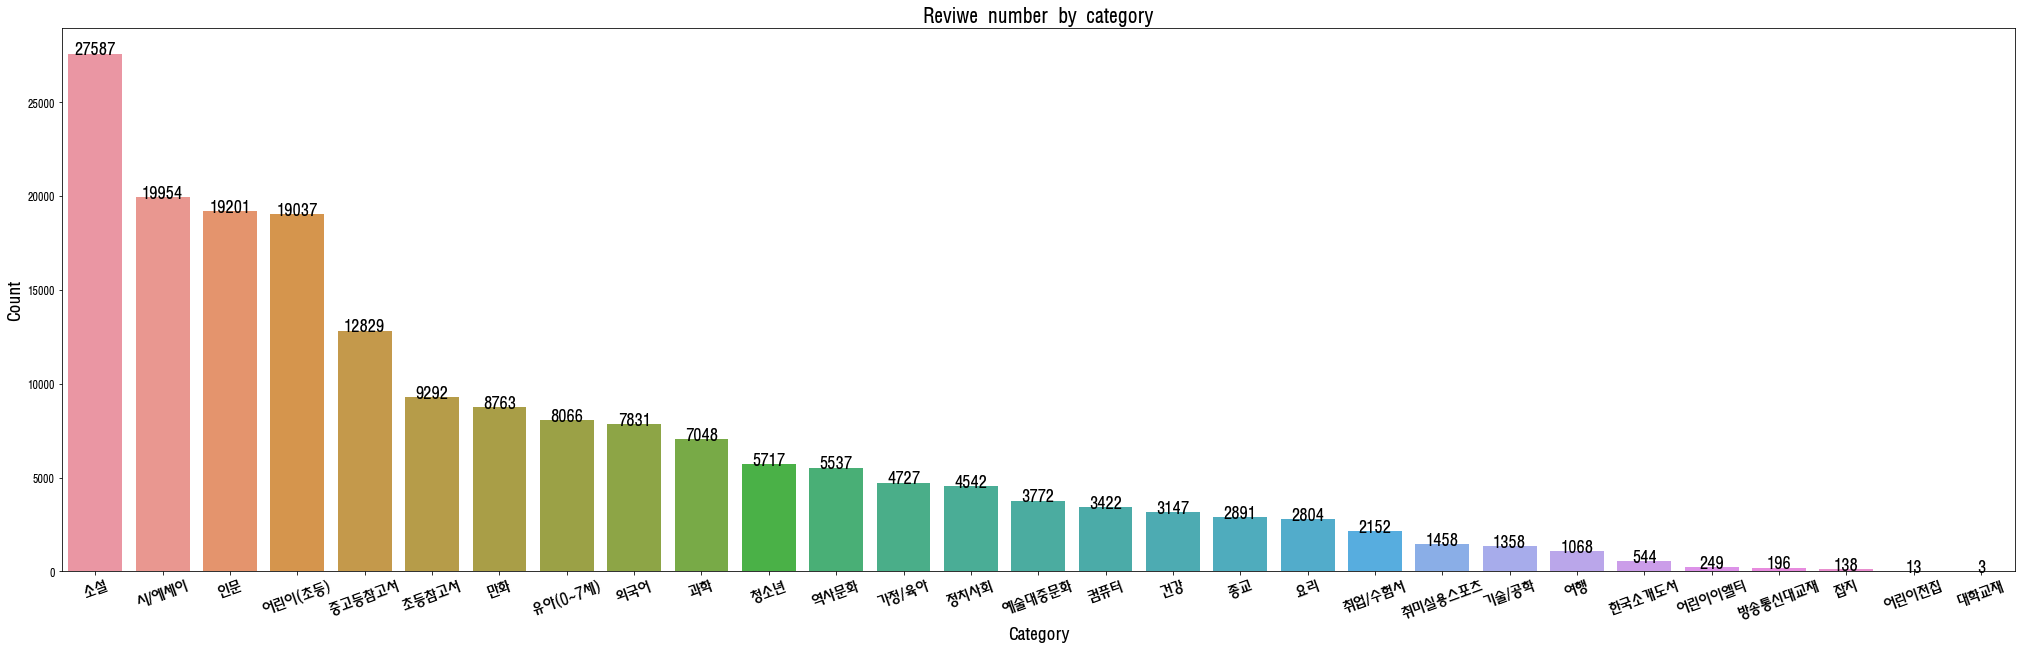

In [11]:
plt.figure(figsize=(35, 10))
bar=sns.barplot(data=gyobo_count,x='category',y='review_num')
bar.set_title('Reviwe number by category', fontsize=18)
bar.set_xlabel('Category', fontdict={'size':16})                  
bar.set_ylabel('Count', fontdict={'size':16}) 
for p in bar.patches: # annotation
    bar.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()-20), ha = 'center', size = 15)
plt.xticks(fontsize=15, rotation=20)
plt.show()

## 리뷰 수 순으로 도서 정렬

In [12]:
gyobo_total = gyobo_anal[['title','total']]
gyobo_total = gyobo_total.drop_duplicates()
gyobo_total = gyobo_total.sort_values('total',ascending=False).head(30)
gyobo_total.reset_index(drop=True,inplace=True)
gyobo_total

,title,total
0,나미야 잡화점의 기적(양장본 HardCover),1976
1,언어의 온도(170만부 기념 에디션),1913
2,여행의 이유,1586
3,설민석의 조선왕조실록,1491
4,아몬드(양장본 HardCover),1477
5,나는 나로 살기로 했다,1465
6,달러구트 꿈 백화점,1388
7,"곰돌이 푸, 행복한 일은 매일 있어",1318
8,사피엔스,1226
9,코스모스(보급판),1105


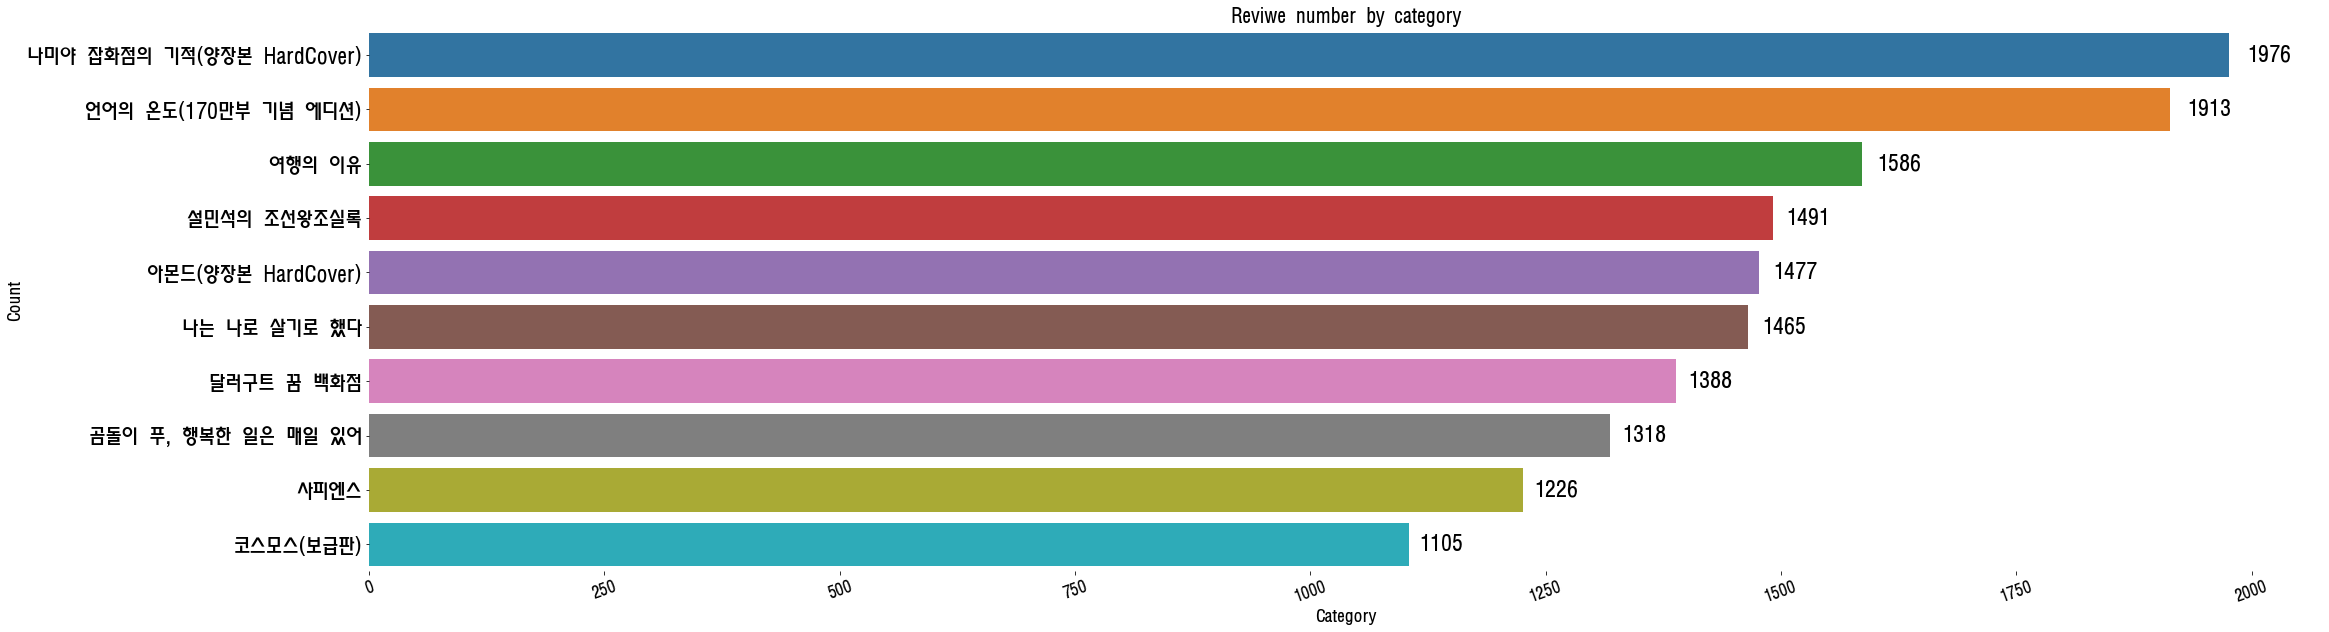

In [13]:
plt.figure(figsize=(35, 10))
bar=sns.barplot(data=gyobo_total.head(10),x='total',y='title')
bar.set_title('Reviwe number by category', fontsize=18)
bar.set_xlabel('Category', fontdict={'size':16})                  
bar.set_ylabel('Count', fontdict={'size':16}) 
for p in bar.patches:
    x, y, width, height = p.get_bbox().bounds
    bar.text(width*1.01, y+height/2, "%.0f"%(width), va='center',size=20)
plt.xticks(fontsize=15, rotation=20)
plt.yticks(fontsize=20)
plt.box(False)
plt.show()

## 카테고리별 키워드 분석

In [14]:
gyobo_kc.value_counts('category')

category
가정/육아       137
시/에세이       137
소설          133
요리          133
인문          132
어린이(초등)     132
외국어         132
청소년         129
종교          128
과학          128
유아(0~7세)    127
취업/수험서      126
역사문화        125
건강          125
취미실용스포츠     124
예술대중문화      124
만화          120
정치사회        120
여행          120
초등참고서       120
컴퓨터         119
중고등참고서      115
기술/공학       106
한국소개도서       93
방송통신대교재      67
잡지           13
어린이이엘티        1
dtype: int64

In [15]:
gyobo_novel =gyobo_kc[gyobo_kc['category']=='한국소개도서'] # 우측의 카테고리 이름 변경시 해당 데이터 확인이 가능하다.
keyword_list = gyobo_novel.keyword.values.tolist()

for i in range(len(keyword_list)):
    if type(keyword_list[i]) != str:
        keyword_list[i] = str(keyword_list[i])
        
        # 수집한 글들을 한 문장으로 합치기
keyword_text = ''

for each_line in keyword_list[:]:
    keyword_text = keyword_text + each_line
keyword_text = keyword_text.split(' ')

keyword_counter =Counter(keyword_text)
keyword_counter.most_common(100)

[('학습', 29),
 ('한국', 19),
 ('수업', 17),
 ('문법', 14),
 ('문화', 14),
 ('설계', 13),
 ('생활', 13),
 ('언어', 11),
 ('성인', 10),
 ('사회', 10),
 ('이민자', 10),
 ('능력', 6),
 ('문제', 6),
 ('한국어', 6),
 ('실전', 6),
 ('오늘', 5),
 ('날씨', 5),
 ('모범', 5),
 ('답안', 5),
 ('외국인', 5),
 ('이주해', 5),
 ('구어', 5),
 ('베트남어', 5),
 ('방법', 5),
 ('발음', 5),
 ('지도서', 5),
 ('유형', 5),
 ('비빔밥', 4),
 ('교재', 4),
 ('문어', 4),
 ('복습', 4),
 ('모의고사', 4),
 ('법무부', 4),
 ('대한민국', 3),
 ('한글', 3),
 ('항목', 3),
 ('취업', 3),
 ('어휘', 3),
 ('음식', 3),
 ('정보', 3),
 ('핵심', 3),
 ('러시아어', 3),
 ('태국어', 3),
 ('몽골어', 3),
 ('연습', 3),
 ('의사소통', 3),
 ('스마트폰', 3),
 ('무역', 3),
 ('회사', 3),
 ('필수', 3),
 ('상황', 2),
 ('규칙', 2),
 ('준비', 2),
 ('성격', 2),
 ('설날', 2),
 ('남북국', 2),
 ('시대', 2),
 ('의례', 2),
 ('강원', 2),
 ('연계', 2),
 ('단원', 2),
 ('명절', 2),
 ('종합', 2),
 ('주세요', 2),
 ('전화', 2),
 ('공부', 2),
 ('지문', 2),
 ('누리', 2),
 ('테니스', 2),
 ('관계', 2),
 ('가요', 2),
 ('담화', 2),
 ('유도', 2),
 ('교통사고', 2),
 ('일요일', 2),
 ('신입', 2),
 ('보조', 2),
 ('유학', 2),
 ('여가', 2),
 ('필리핀', 2),
 

In [16]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['.',' ', '\n', 'nan','소설','한국','문학','작가','작품','집','에세이']

keyword_text = [word for word in keyword_text if not word in stop_words] #불용어 제거
keyword_counter = Counter(keyword_text)
rank=keyword_counter.most_common(15)
rank

[('학습', 29),
 ('수업', 17),
 ('문법', 14),
 ('문화', 14),
 ('설계', 13),
 ('생활', 13),
 ('언어', 11),
 ('성인', 10),
 ('사회', 10),
 ('이민자', 10),
 ('능력', 6),
 ('문제', 6),
 ('한국어', 6),
 ('실전', 6),
 ('오늘', 5)]

In [17]:
data = pd.DataFrame.from_dict(dict(rank),orient='index')

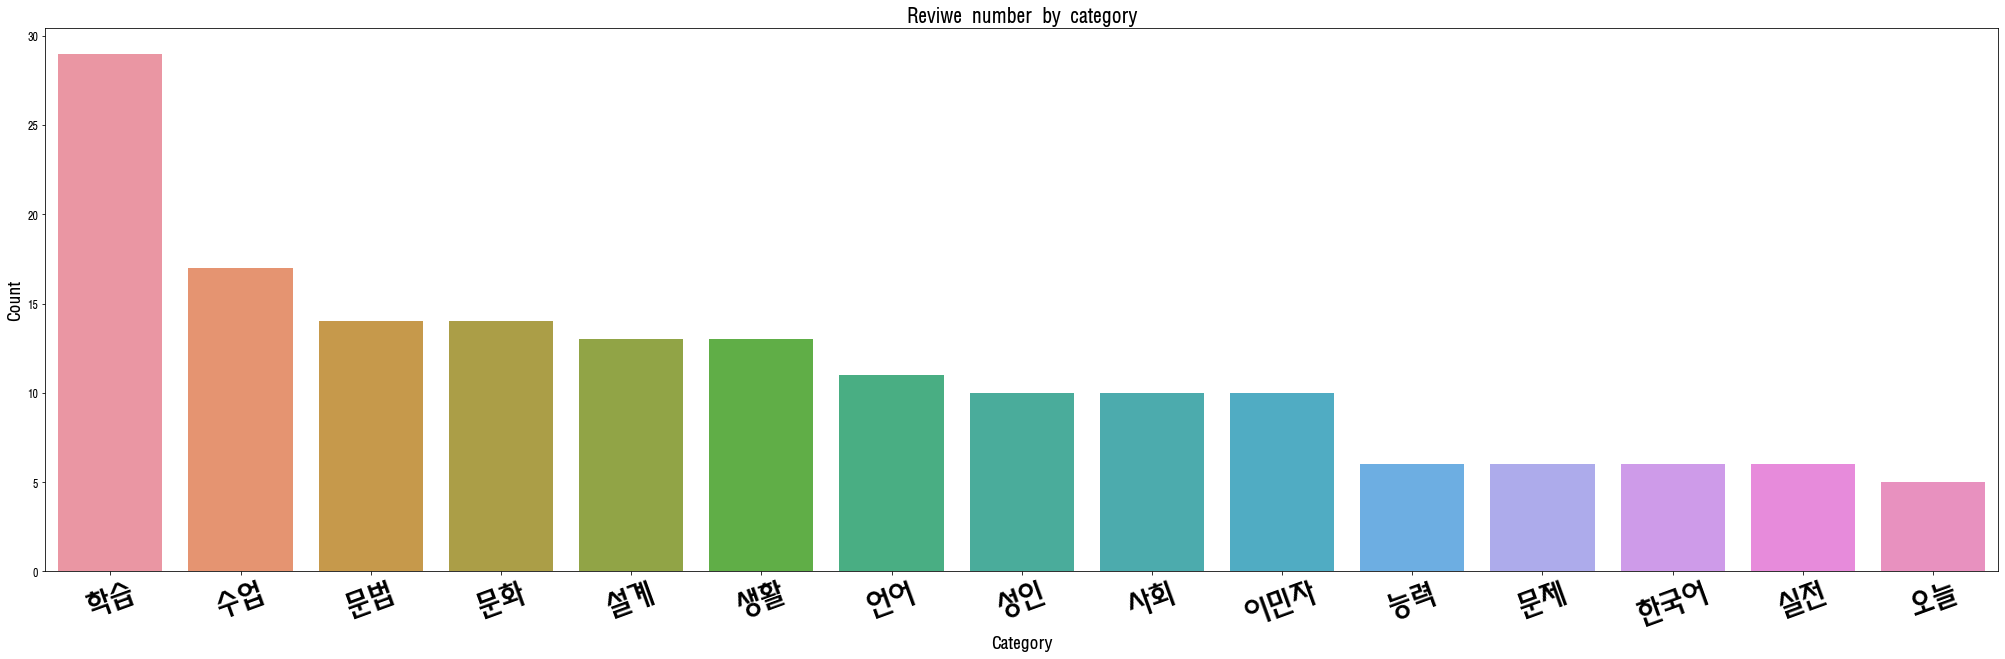

In [18]:
plt.figure(figsize=(35, 10))
bar=sns.barplot(data=data,x=data.index,y=data[0])
bar.set_title('Reviwe number by category', fontsize=18)
bar.set_xlabel('Category', fontdict={'size':16})                  
bar.set_ylabel('Count', fontdict={'size':16}) 

plt.xticks(fontsize=30, rotation=20)
plt.show()

In [19]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

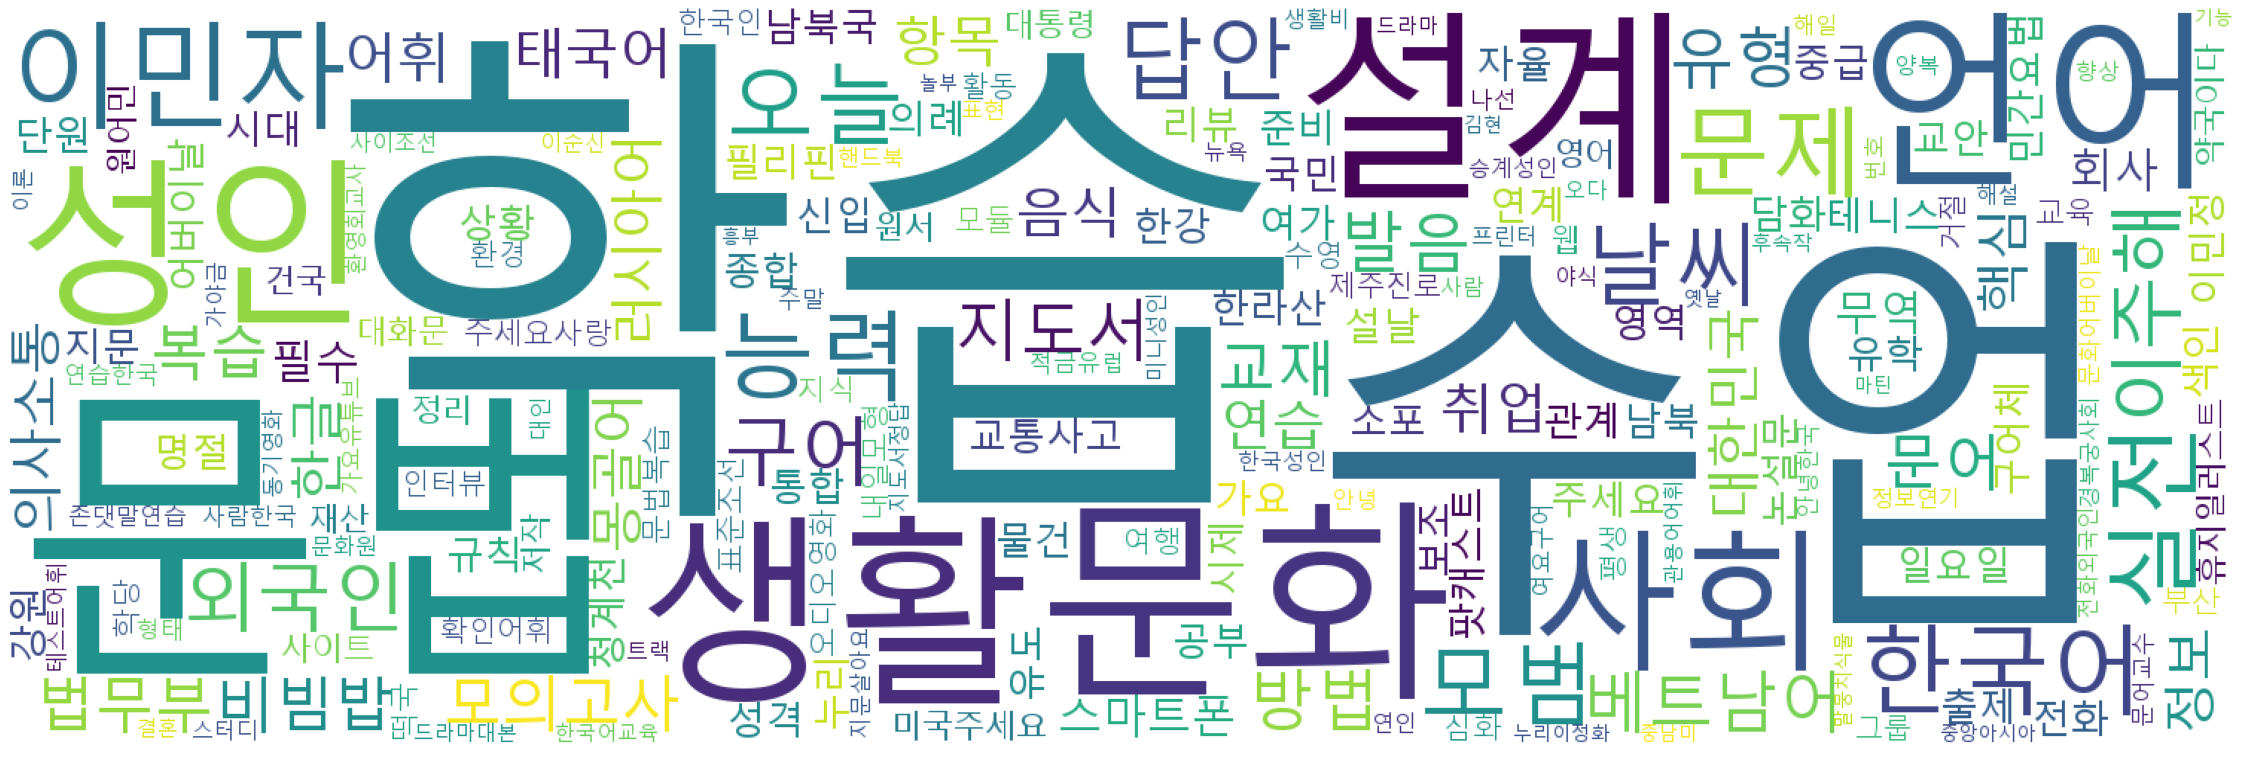

In [20]:
# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',  # 윈도우:'c:/Windows/Fonts/malgun.ttf'
                      relative_scaling = 0.4, 
                      #stopwords=STOPWORDS,
                      background_color='white',
                      width=1500, height=500).generate_from_frequencies(dict(keyword_counter))
plt.figure(figsize=(40,40))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 전체 리뷰 단어 분석

In [21]:
content_list = gyobo_anal.comment.values.tolist()

In [22]:
# 수집한 글들을 한 문장으로 합치기
content_text = ''

for each_line in content_list[:2000]:
    content_text = content_text + each_line + '\n'

In [23]:
# 형태소 분석기를 통해 명사만 추출하는 함수
def tokenizer_konlpy(text):
    okt=Okt()  
    return [word for word in okt.nouns(text)] 
noun_token = tokenizer_konlpy(content_text)
print(noun_token)

['추천', '바로', '구매', '책', '덕분', '선착순', '초도', '제', '것', '뿐', '것', '책', '레터', '링', '케이크', '상태', '도', '것', '알', '디자인', '알', '수', '요즘', '유행', '케이크', '인기', '케이크', '저', '책', '먼저', '접', '역시', '실력', '책', '정독', '책', '디자인', '얼른', '여러', '디자인', '보고', '생각', '책', '평이', '구매', '활용', '거', '완전', '꼭', '더', '디자인', '누나', '정말', '이', '책', '통해', '만', '전체', '볼', '만해', '책', '디피', '상품', '신건', '환불', '상품', '책', '몇장', '장', '지모', '새', '책', '구매', '디자인', '케이크', '주문', '케이크', '때', '도움', '것', '설명', '제', '수', '제지', '증', '케이크', '관심', '기초', '누', '컬러', '조색', '팁', '등', '독학', '책', '발견', '바로', '구매', '도움', '책', '기초', '케이크', '여러가지', '기초', '장비', '지식', '저', '정말', '재료', '기초', '필요', '장비', '더욱', '폭', '이해', '그림', '떡', '그대', '케이크', '책', '초보자', '정말', '볼', '수', '책', '누', '종류', '별로', '법', '케이크', '데커', '레이', '션', '방법', '보기', '정리', '정말', '인생', '갈림길', '때', '도움', '유투', '버', '지식', '칼', '추천', '소장', '책', '주문', '완료', '주변', '필독', '추천', '삶', '대한', '자세', '새로이', '다시', '또', '감동', '이', '책', '내', '표지', '무엇', '생각', '제', '삶', '표지', '이', '책', '걸', '깨', '마음', 

In [24]:
ko = nltk.Text(noun_token)   
print(len(noun_token))          # 토큰 전체 갯수
print(len(set(noun_token)))     # 토큰 unique 갯수

9882
2009


In [25]:
ko = nltk.Text(noun_token)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개

[('책', 694),
 ('마음', 201),
 ('공감', 171),
 ('것', 160),
 ('아이', 137),
 ('수', 129),
 ('생각', 127),
 ('내용', 105),
 ('구매', 101),
 ('추천', 96),
 ('도움', 91),
 ('사람', 86),
 ('이', 80),
 ('때', 74),
 ('위로', 72),
 ('다시', 71),
 ('내', 67),
 ('선물', 67),
 ('대해', 66),
 ('정말', 61),
 ('나', 59),
 ('요', 57),
 ('더', 56),
 ('이해', 55),
 ('구입', 52),
 ('공부', 52),
 ('알', 51),
 ('삶', 51),
 ('기대', 44),
 ('치유', 44),
 ('저', 43),
 ('보고', 43),
 ('글', 43),
 ('독해', 43),
 ('불안', 41),
 ('문제', 40),
 ('대한', 38),
 ('꼭', 37),
 ('그', 37),
 ('말', 36),
 ('작가', 36),
 ('집', 36),
 ('우리', 34),
 ('단계', 34),
 ('한번', 33),
 ('해', 33),
 ('다른', 33),
 ('독해력', 33),
 ('또', 32),
 ('느낌', 31),
 ('힘', 31),
 ('자신', 31),
 ('풀', 31),
 ('위해', 30),
 ('당신', 29),
 ('인생', 28),
 ('감정', 28),
 ('방법', 26),
 ('최고', 26),
 ('시작', 26),
 ('학년', 25),
 ('이야기', 25),
 ('제', 24),
 ('배송', 24),
 ('번', 24),
 ('위', 24),
 ('역시', 23),
 ('시간', 23),
 ('스스로', 23),
 ('관계', 23),
 ('상처', 23),
 ('거', 22),
 ('주변', 22),
 ('조금', 22),
 ('좀', 22),
 ('어휘', 22),
 ('요즘', 21),
 ('통해', 21),


In [26]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = ['.',' ', '\n','\n ', 'nan','소설','대한','보고','정말','대해','책','것','수','이','내','때','나','요','더','알','꼭','그','저','제','번','위','해','다른','또']

noun_token = [each_word for each_word in noun_token
             if each_word not in stop_words]

ko = nltk.Text(noun_token)
ko.vocab().most_common(50)

[('마음', 201),
 ('공감', 171),
 ('아이', 137),
 ('생각', 127),
 ('내용', 105),
 ('구매', 101),
 ('추천', 96),
 ('도움', 91),
 ('사람', 86),
 ('위로', 72),
 ('다시', 71),
 ('선물', 67),
 ('이해', 55),
 ('구입', 52),
 ('공부', 52),
 ('삶', 51),
 ('기대', 44),
 ('치유', 44),
 ('글', 43),
 ('독해', 43),
 ('불안', 41),
 ('문제', 40),
 ('말', 36),
 ('작가', 36),
 ('집', 36),
 ('우리', 34),
 ('단계', 34),
 ('한번', 33),
 ('독해력', 33),
 ('느낌', 31),
 ('힘', 31),
 ('자신', 31),
 ('풀', 31),
 ('위해', 30),
 ('당신', 29),
 ('인생', 28),
 ('감정', 28),
 ('방법', 26),
 ('최고', 26),
 ('시작', 26),
 ('학년', 25),
 ('이야기', 25),
 ('배송', 24),
 ('역시', 23),
 ('시간', 23),
 ('스스로', 23),
 ('관계', 23),
 ('상처', 23),
 ('거', 22),
 ('주변', 22)]

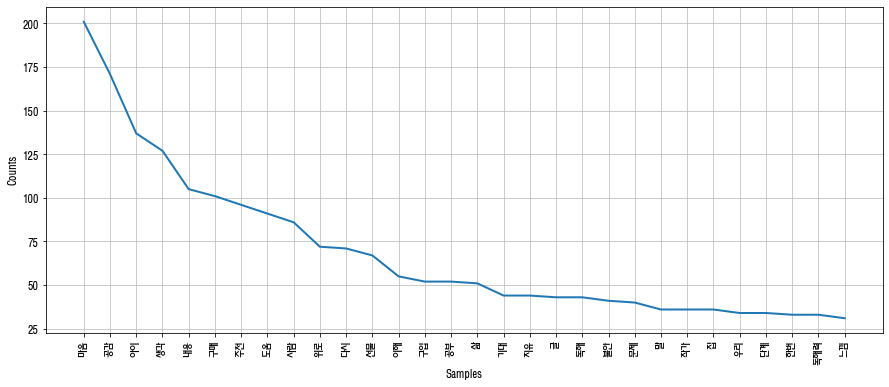

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(30) 
plt.show()

* 전체 리뷰에서 명사 추출

In [28]:
data = ko.vocab().most_common(300)
data

[('마음', 201),
 ('공감', 171),
 ('아이', 137),
 ('생각', 127),
 ('내용', 105),
 ('구매', 101),
 ('추천', 96),
 ('도움', 91),
 ('사람', 86),
 ('위로', 72),
 ('다시', 71),
 ('선물', 67),
 ('이해', 55),
 ('구입', 52),
 ('공부', 52),
 ('삶', 51),
 ('기대', 44),
 ('치유', 44),
 ('글', 43),
 ('독해', 43),
 ('불안', 41),
 ('문제', 40),
 ('말', 36),
 ('작가', 36),
 ('집', 36),
 ('우리', 34),
 ('단계', 34),
 ('한번', 33),
 ('독해력', 33),
 ('느낌', 31),
 ('힘', 31),
 ('자신', 31),
 ('풀', 31),
 ('위해', 30),
 ('당신', 29),
 ('인생', 28),
 ('감정', 28),
 ('방법', 26),
 ('최고', 26),
 ('시작', 26),
 ('학년', 25),
 ('이야기', 25),
 ('배송', 24),
 ('역시', 23),
 ('시간', 23),
 ('스스로', 23),
 ('관계', 23),
 ('상처', 23),
 ('거', 22),
 ('주변', 22),
 ('조금', 22),
 ('좀', 22),
 ('어휘', 22),
 ('요즘', 21),
 ('통해', 21),
 ('아주', 21),
 ('사랑', 21),
 ('심리학', 21),
 ('주문', 20),
 ('듯', 20),
 ('개', 20),
 ('교재', 20),
 ('설명', 19),
 ('별로', 19),
 ('줄', 19),
 ('권', 19),
 ('부분', 19),
 ('소장', 18),
 ('처음', 18),
 ('지인', 18),
 ('여행', 18),
 ('힐링', 18),
 ('도서', 18),
 ('분', 18),
 ('구성', 18),
 ('지문', 18),
 ('정독', 17),
 (

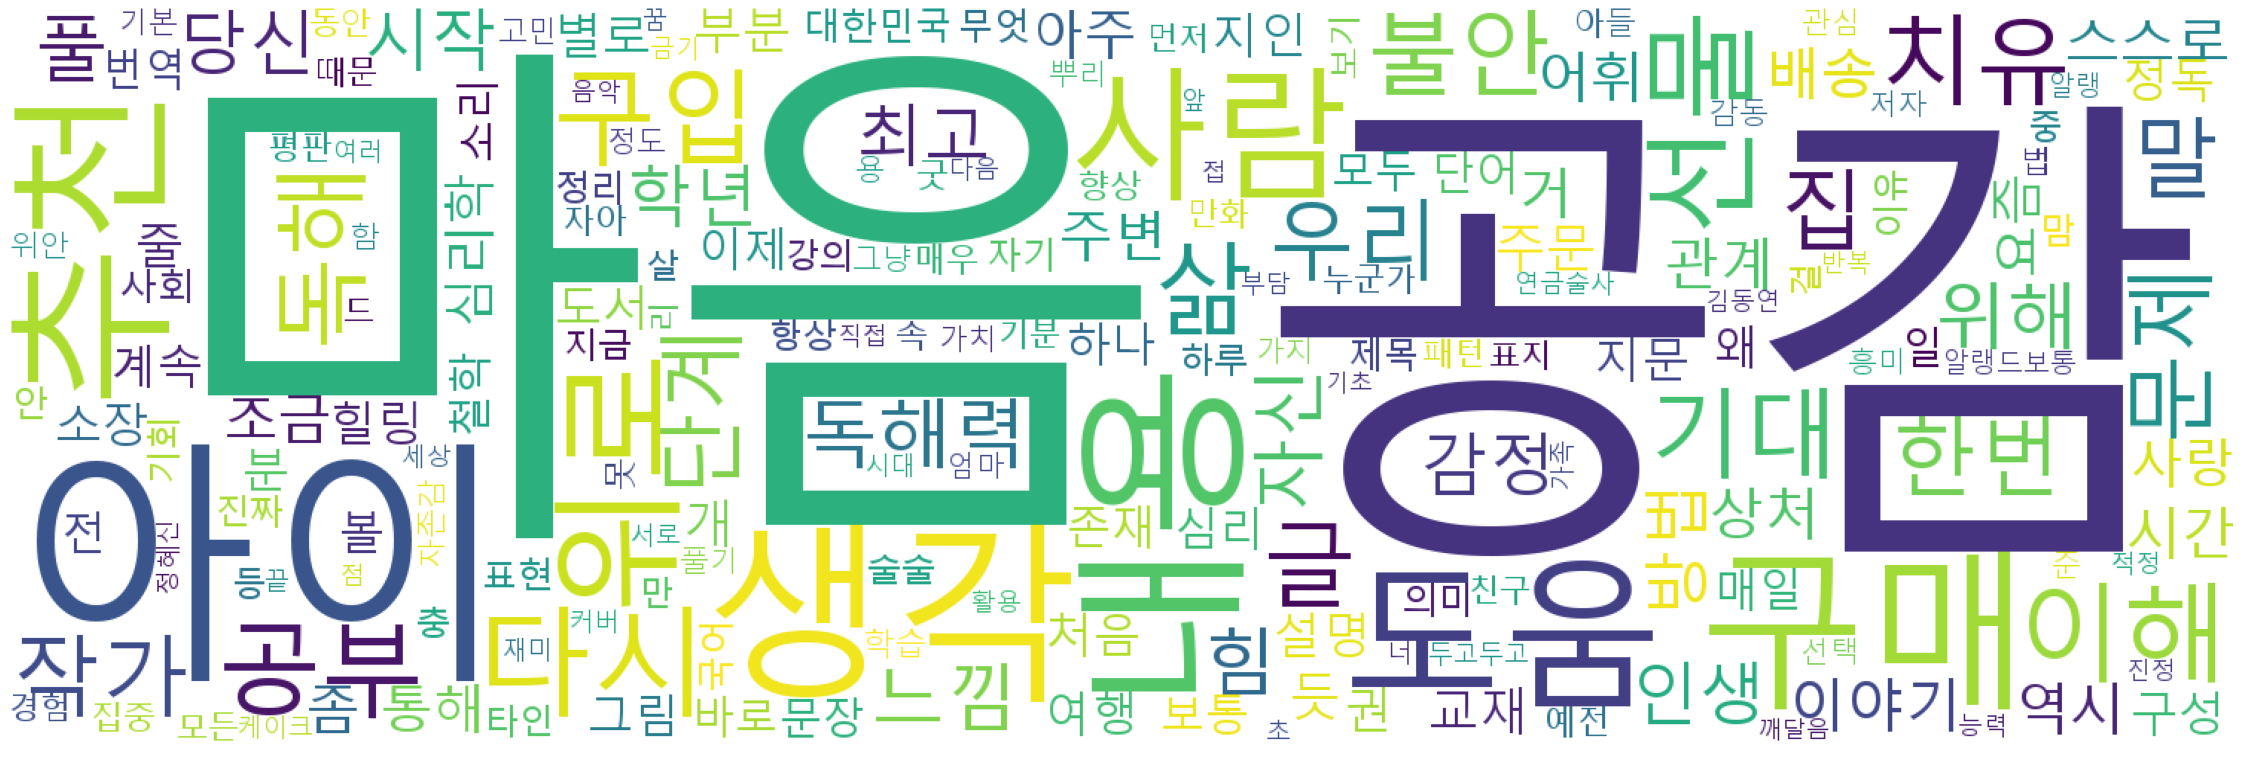

In [29]:
# 리뷰 기반 워드클라우드
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',  # 윈도우:'c:/Windows/Fonts/malgun.ttf'
                      relative_scaling = 0.4, 
                      #stopwords=STOPWORDS,
                      background_color='white',
                      width=1500, height=500).generate_from_frequencies(dict(data))
plt.figure(figsize=(40,40))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- 전체 리뷰에서 명사만 추출한 것입니다.

# 추천시스템

## CBF 카테고리 기반 추천시스템

### 함수설정 및 데이터 불러오기

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
# 가중평점 반영 안한 추천시스템
def find_sim_book_ver1(gyobo_CBF, sorted_ind, title_name, top_n=10):
    
    # 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
    title_book = gyobo_CBF[gyobo_CBF['title'] == title_name]
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    title_index = title_book.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임.
    # dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    print(similar_indexes)    
    # 2차원 데이터를 1차원으로 변환
    similar_indexes = similar_indexes.reshape(-1)
    
    return gyobo_CBF.iloc[similar_indexes]

In [32]:
# 가중평점 반영한 추천시스템
def find_sim_book_ver2(gyobo_CBF, sorted_ind, title_name, top_n=10):
    title_book = gyobo_CBF[gyobo_CBF['title'] == title_name]
    title_index = title_book.index.values
    
    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출
    similar_indexes = sorted_ind[title_index, :(top_n*1)]
    similar_indexes = similar_indexes.reshape(-1)

    # 기준 서적 index는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    return gyobo_CBF.iloc[similar_indexes].sort_values('weighted_score', ascending=False)[:top_n]

In [33]:
# 필요한 컬럼만 추출
gyobo_CBF = gyobo[['title', 'keyword', 'score', 'total']]

# 중복데이터 제거
gyobo_CBF = gyobo_CBF.drop_duplicates(subset="title", keep='first', inplace=False, ignore_index=False)
gyobo_CBF.reset_index(drop=True, inplace=True)
gyobo_CBF

,title,keyword,score,total
0,첫 번째 디자인 케이크,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15
1,연금술사,마음 모험 연금술 만물 성장소설 영혼,9.6,350
2,그때 그 마음(2022 제67회 현대문학상 수상소설집),순정 혜성 초파리 심사 폐허 허공,10.0,5
3,대한민국 금기 깨기,부총리 전어 기회 반란 디지털 경제 국민,9.4,37
4,하루 한 장 아이패드 드로잉,에세이 그림 인스타그램 그리기 도안 일러스트,9.9,17
...,...,...,...,...
3234,스물아홉 생일 1년 후 죽기로 결심했다,시한부 자전적에세이 라스베이거스 선고 치열 외톨이,9.2,368
3235,Bricks Easy Listening 100. 2,NaN,10.0,2
3236,백조와 박쥐,일본소설 살인사건 미스터리소설 작품 미스터리 일본 추리 소설,9.7,211
3237,스포츠심리학의 정석(개정판),불안 모범 답안 실습 과제 평가 문항 효능감 복습,10.0,2


In [34]:
# 결측치 확인 및 결측치 제거
gyobo_CBF.isnull().sum()
# 결측치 삭제
gyobo_CBF = gyobo_CBF.dropna(axis=0)

In [35]:
gyobo_CBF

,title,keyword,score,total
0,첫 번째 디자인 케이크,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15
1,연금술사,마음 모험 연금술 만물 성장소설 영혼,9.6,350
2,그때 그 마음(2022 제67회 현대문학상 수상소설집),순정 혜성 초파리 심사 폐허 허공,10.0,5
3,대한민국 금기 깨기,부총리 전어 기회 반란 디지털 경제 국민,9.4,37
4,하루 한 장 아이패드 드로잉,에세이 그림 인스타그램 그리기 도안 일러스트,9.9,17
...,...,...,...,...
3233,그러라 그래(양장본 HardCover),인생 에세이 삶 김나영 여성 시대 아이유,9.4,180
3234,스물아홉 생일 1년 후 죽기로 결심했다,시한부 자전적에세이 라스베이거스 선고 치열 외톨이,9.2,368
3236,백조와 박쥐,일본소설 살인사건 미스터리소설 작품 미스터리 일본 추리 소설,9.7,211
3237,스포츠심리학의 정석(개정판),불안 모범 답안 실습 과제 평가 문항 효능감 복습,10.0,2


In [36]:
# 카테고리(= 책 장르 컬럼 추가)
gyobo_CBF = gyobo_CBF.join(gyobo_best.set_index('title')['카테고리'], on='title')

In [37]:
# 카테고리와 장르 합친 새로운 컬럼 생성
gyobo_CBF["keyword2"] = gyobo_CBF["카테고리"] + " " + gyobo_CBF["keyword"]
# 중복데이터 제거
gyobo_CBF = gyobo_CBF.drop_duplicates(subset="title", keep='first', inplace=False, ignore_index=False)
gyobo_CBF.reset_index(drop=True, inplace=True)
gyobo_CBF

,title,keyword,score,total,카테고리,keyword2
0,첫 번째 디자인 케이크,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,요리,요리 디저트 초코 아이싱 플라워 제과제빵 밀크티
1,연금술사,마음 모험 연금술 만물 성장소설 영혼,9.6,350,소설,소설 마음 모험 연금술 만물 성장소설 영혼
2,그때 그 마음(2022 제67회 현대문학상 수상소설집),순정 혜성 초파리 심사 폐허 허공,10.0,5,소설,소설 순정 혜성 초파리 심사 폐허 허공
3,대한민국 금기 깨기,부총리 전어 기회 반란 디지털 경제 국민,9.4,37,정치사회,정치사회 부총리 전어 기회 반란 디지털 경제 국민
4,하루 한 장 아이패드 드로잉,에세이 그림 인스타그램 그리기 도안 일러스트,9.9,17,예술대중문화,예술대중문화 에세이 그림 인스타그램 그리기 도안 일러스트
...,...,...,...,...,...,...
3091,그러라 그래(양장본 HardCover),인생 에세이 삶 김나영 여성 시대 아이유,9.4,180,시/에세이,시/에세이 인생 에세이 삶 김나영 여성 시대 아이유
3092,스물아홉 생일 1년 후 죽기로 결심했다,시한부 자전적에세이 라스베이거스 선고 치열 외톨이,9.2,368,시/에세이,시/에세이 시한부 자전적에세이 라스베이거스 선고 치열 외톨이
3093,백조와 박쥐,일본소설 살인사건 미스터리소설 작품 미스터리 일본 추리 소설,9.7,211,소설,소설 일본소설 살인사건 미스터리소설 작품 미스터리 일본 추리 소설
3094,스포츠심리학의 정석(개정판),불안 모범 답안 실습 과제 평가 문항 효능감 복습,10.0,2,취미실용스포츠,취미실용스포츠 불안 모범 답안 실습 과제 평가 문항 효능감 복습


In [38]:
# CountVectorizer로 학습시켰더니 3097개의 책에 대한 22885개의 키워드의 "키워드 매트릭스"가 생성되었다.

count_vect = CountVectorizer(min_df=0, ngram_range=(1, 2))  # min_df: 단어장에 들어갈 최소빈도, ngram_range: 1 <= n <= 2 1단어, 2단어까지
genre_mat = count_vect.fit_transform(gyobo_CBF['keyword']) # 키워드 기반학습

In [39]:
gyobo_CBF = gyobo_CBF.dropna(axis=0)

In [40]:
count_vect = CountVectorizer(min_df=0, ngram_range=(1, 2))
genre_mat2 = count_vect.fit_transform(gyobo_CBF['keyword2']) # 키워드2 기반 학습

In [41]:
# 키워드 기반 학습
print(genre_mat.shape)
print(genre_mat)

(3096, 22882)
  (0, 4727)	1
  (0, 18779)	1
  (0, 12101)	1
  (0, 20950)	1
  (0, 17168)	1
  (0, 6916)	1
  (0, 4734)	1
  (0, 18780)	1
  (0, 12103)	1
  (0, 20953)	1
  (0, 17169)	1
  (1, 5428)	1
  (1, 6123)	1
  (1, 13218)	1
  (1, 5558)	1
  (1, 9827)	1
  (1, 13591)	1
  (1, 5438)	1
  (1, 6137)	1
  (1, 13219)	1
  (1, 5559)	1
  (1, 9831)	1
  (2, 10633)	1
  (2, 22370)	1
  (2, 18790)	1
  :	:
  (3094, 6026)	1
  (3094, 3828)	1
  (3094, 6027)	1
  (3094, 8283)	1
  (3094, 11668)	1
  (3094, 1399)	1
  (3094, 22729)	1
  (3094, 8284)	1
  (3094, 3830)	1
  (3094, 11669)	1
  (3094, 1401)	1
  (3094, 20529)	1
  (3094, 6558)	1
  (3094, 22730)	1
  (3095, 16886)	1
  (3095, 1200)	1
  (3095, 1558)	1
  (3095, 10306)	1
  (3095, 20997)	1
  (3095, 13532)	1
  (3095, 16887)	1
  (3095, 1224)	1
  (3095, 13538)	1
  (3095, 10307)	1
  (3095, 1561)	1


In [42]:
# 키워드2(카테고리 + 키워드) 기반 학습
print(genre_mat2.shape)
print(genre_mat2)

(3095, 24435)
  (0, 14845)	1
  (0, 5019)	1
  (0, 20133)	1
  (0, 12598)	1
  (0, 22453)	1
  (0, 18267)	1
  (0, 7255)	1
  (0, 14856)	1
  (0, 5026)	1
  (0, 20134)	1
  (0, 12600)	1
  (0, 22456)	1
  (0, 18268)	1
  (1, 10497)	1
  (1, 5720)	1
  (1, 6462)	1
  (1, 13907)	1
  (1, 5850)	1
  (1, 10229)	1
  (1, 14280)	1
  (1, 10516)	1
  (1, 5730)	1
  (1, 6476)	1
  (1, 13908)	1
  (1, 5851)	1
  :	:
  (3093, 8685)	1
  (3093, 12165)	1
  (3093, 1617)	1
  (3093, 24282)	1
  (3093, 20370)	1
  (3093, 8686)	1
  (3093, 4122)	1
  (3093, 12166)	1
  (3093, 1619)	1
  (3093, 22032)	1
  (3093, 6897)	1
  (3093, 24283)	1
  (3094, 14743)	1
  (3094, 17893)	1
  (3094, 14787)	1
  (3094, 1344)	1
  (3094, 1849)	1
  (3094, 10734)	1
  (3094, 22500)	1
  (3094, 14221)	1
  (3094, 17894)	1
  (3094, 1368)	1
  (3094, 14227)	1
  (3094, 10735)	1
  (3094, 1852)	1


In [43]:
# 코사인 유사도에 의해 3096개 리스트에 대한 유사한 책 계산
from sklearn.metrics.pairwise import cosine_similarity
genre_sim = cosine_similarity(genre_mat, genre_mat)
genre_sim2 = cosine_similarity(genre_mat2, genre_mat2)

print(genre_sim.shape) # 키워드 기반
print(genre_sim[:10])

print(genre_sim2.shape) # 키워드2(카테고리+키워드) 기반
print(genre_sim2[:10])

(3096, 3096)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(3095, 3095)
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.07692308 ... 0.12725695 0.         0.        ]
 [0.         0.07692308 1.         ... 0.12725695 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.07161149]]


In [44]:
# 자료를 정렬하는 것이 아니라 순서만 알고 싶다면 argsort
# 유사도가 높은 책을 앞에서부터 순서대로 보여줌

# 0번째 책의 경우 유사도 순서 : 0번, 3494번, 813번, ..., 2401 순서
# 키워드 기반
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1] # ::-1 : 역순으로 정렬
print(genre_sim_sorted_ind[:5])

#키워드2 기반
genre_sim_sorted_ind2 = genre_sim2.argsort()[:, ::-1] # ::-1 : 역순으로 정렬
print(genre_sim_sorted_ind[:5])

[[   0  791 2615 ... 2055 2054 1547]
 [   1  653 2165 ... 2049 2048    0]
 [   2 2256 1088 ... 2058 2057    0]
 [   3 2875  263 ... 2054 2053    0]
 [   4 2220 1422 ... 2043 2042    0]]
[[   0  791 2615 ... 2055 2054 1547]
 [   1  653 2165 ... 2049 2048    0]
 [   2 2256 1088 ... 2058 2057    0]
 [   3 2875  263 ... 2054 2053    0]
 [   4 2220 1422 ... 2043 2042    0]]


In [45]:
print(genre_sim_sorted_ind)

print(genre_sim_sorted_ind2)

[[   0  791 2615 ... 2055 2054 1547]
 [   1  653 2165 ... 2049 2048    0]
 [   2 2256 1088 ... 2058 2057    0]
 ...
 [3093  897  949 ... 2029 2028    0]
 [3094  192 1059 ... 2042 2041    0]
 [3095  671 2080 ... 2039 2038    0]]
[[   0  791 1715 ... 2027 2026 1547]
 [   1 2164 1013 ... 2022 2021    0]
 [   2 2659 2885 ... 2033 2032    0]
 ...
 [3092  949  897 ... 2016 2015    0]
 [3093  192  792 ... 2021 2020    0]
 [3094 1057  671 ... 2020 2018    0]]


In [46]:
# 인자로 입력된 movies_df DataFrame에서 'title' 컬럼이 입력된 title_name 값인 DataFrame추출
title_book = gyobo_CBF[gyobo_CBF['title'] == '스포츠심리학의 정석(개정판)']
title_book

,title,keyword,score,total,카테고리,keyword2
3094,스포츠심리학의 정석(개정판),불안 모범 답안 실습 과제 평가 문항 효능감 복습,10.0,2,취미실용스포츠,취미실용스포츠 불안 모범 답안 실습 과제 평가 문항 효능감 복습


In [47]:
# title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
# sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
title_index = title_book.index.values
title_index

array([3094], dtype=int64)

In [48]:
similar_indexes = genre_sim_sorted_ind[title_index, :10]
similar_indexes2 = genre_sim_sorted_ind2[title_index, :10]

print(similar_indexes)
print(similar_indexes2)

[[3094  192 1059  792 2821  267 2554 1552   36 2678]]
[[3094 1057  671  760  206 1905 1206 2072 2048 2322]]


In [49]:
# 추출된 top_n index들 출력. top_n index는 2차원 데이터 임.
# dataframe에서 index로 사용하기 위해서 2차원 array를 1차원 array로 변경
similar_indexes = similar_indexes.reshape(-1)
similar_indexes2 = similar_indexes2.reshape(-1)
print(similar_indexes)

[3094  192 1059  792 2821  267 2554 1552   36 2678]


###  연금술사와 10개 추천(키워드 기반)

In [50]:
similar_book = find_sim_book_ver1(gyobo_CBF, genre_sim_sorted_ind, '연금술사', 10) # 책 제목 입력
similar_book[['title', 'score', 'total', 'keyword']]
# 문제 ; 평점 기반으로 추천하고자 하는데, vote_count가 낮은 책 제외하고 싶음

[[   1  653 2165 1432 1640  498 2946 1825  309 1234]]


,title,score,total,keyword
1,연금술사,9.6,350,마음 모험 연금술 만물 성장소설 영혼
653,작별하지 않는다,9.3,181,한국소설 삶 마음 사랑 작가 인선
2166,2022 해커스공무원 장재혁 행정법총론 단원별 기출문제집,10.0,14,행정소송 행정 과정 행정 법통 정법 행정쟁송 정상
1432,필라테스 바이블(조셉 필라테스의),10.0,20,마음 로빈스 컨트롤 몸 트위스트 균형
1640,"그냥, 2200km를 걷다",8.8,4,모험 알베르 리스본 순례길 카미노 산티아고
498,정재승의 인간 탐구 보고서. 8: 불안이 온갖 미신을 만든다(어린이를 위한 뇌과학 ...,10.0,44,심리학 뇌과학 마음 외계인 지구인 루이
2947,이렇게 맛있고 멋진 채식이라면. 2: 다이어트가 내 안으로,10.0,2,건강 말린 스무디 슈카 낫토 아보카도
1825,귀멸의 칼날. 22,9.4,177,판타지만화 만화 성장 모험 카마 다이쇼
309,귀멸의 칼날. 12,9.8,217,판타지만화 우정 성장 모험 요리 상현
1234,귀멸의 칼날. 11,9.8,191,판타지만화 우정 성장 모험 도깨비 우즈


###  연금술사와 유사한 책 10개추천(장르추가된 키워드 기반)

In [51]:
similar_book = find_sim_book_ver1(gyobo_CBF, genre_sim_sorted_ind2, '연금술사', 10) # 책 제목 입력
similar_book[['title', 'score', 'total', 'keyword2']]
# 문제 ; 평점 기반으로 추천하고자 하는데, vote_count가 낮은 책은 제외하고 싶음

[[   1 2164 1013  767 3056 2350  653 2659 2020 2885]]


,title,score,total,keyword2
1,연금술사,9.6,350,소설 마음 모험 연금술 만물 성장소설 영혼
2165,라이온의 간식,9.9,32,소설 위로 인생 삶 마음 감동 소설
1013,호수의 일(양장본 HardCover),9.8,32,소설 마음 상처 호정 사춘기 아이 치유 겨울
767,그리스인 조르바(열린책들 세계문학 21)(양장본 HardCover),9.5,150,소설 세계고전문학 우정 성장 장편소설 소설 영혼
3057,쇼코의 미소,9.5,583,소설 소설집 마음 중 단편 소설 젊은작가상 타인 소설가
2351,수레바퀴 아래서(세계문학전집 50),9.5,90,소설 세계고전문학 노벨 문학상 자전 소설 신학교 성장소설 소년
653,작별하지 않는다,9.3,181,소설 한국소설 삶 마음 사랑 작가 인선
2660,자기 앞의 생(문학동네 세계문학)(양장본 HardCover),9.6,269,소설 소설 인생 삶 작가 사랑 모모
2021,어린 왕자(양장본 HardCover),9.7,155,소설 세계고전문학 삶 소설 어린이 작품 번역
2886,불편한 편의점(15만부 기념 윈터 에디션),9.8,634,소설 한국소설 삶 위로 소설 독고 여사


### 가중평점(평점&평가횟수) 반영한추천시스템

In [52]:
# 상위 60%에 해당하는 vote_count를 최소 투표 횟수인 m으로 지정
C = gyobo_CBF['score'].mean()
m = gyobo_CBF['total'].quantile(0.6)

In [53]:
def weighted_vote_average(record):
    v = record['total']
    R = record['score']
    
    return ( (v/(v+m)) * R ) + ( (m/(m+v)) * C )

In [54]:
# 가중평점(weighted_vote) 카테고리 추가
gyobo_CBF['weighted_score'] = gyobo_CBF.apply(weighted_vote_average, axis=1)

In [55]:
# 가중평점(weighted_vote) 기준으로 버터도 달걀도 필요 없는 건강빵과 유사한 책 추천
# 키워드1 기반
similar_movies = find_sim_book_ver2(gyobo_CBF, genre_sim_sorted_ind, '연금술사', 10)
similar_movies[['title', 'score', 'weighted_score', 'keyword', 'total']]

,title,score,weighted_score,keyword,total
498,정재승의 인간 탐구 보고서. 8: 불안이 온갖 미신을 만든다(어린이를 위한 뇌과학 ...,10.0,9.858322,심리학 뇌과학 마음 외계인 지구인 루이,44
1432,필라테스 바이블(조셉 필라테스의),10.0,9.781043,마음 로빈스 컨트롤 몸 트위스트 균형,20
309,귀멸의 칼날. 12,9.8,9.779941,판타지만화 우정 성장 모험 요리 상현,217
1234,귀멸의 칼날. 11,9.8,9.777516,판타지만화 우정 성장 모험 도깨비 우즈,191
2166,2022 해커스공무원 장재혁 행정법총론 단원별 기출문제집,10.0,9.746471,행정소송 행정 과정 행정 법통 정법 행정쟁송 정상,14
2947,이렇게 맛있고 멋진 채식이라면. 2: 다이어트가 내 안으로,10.0,9.629457,건강 말린 스무디 슈카 낫토 아보카도,2
1640,"그냥, 2200km를 걷다",8.8,9.484496,모험 알베르 리스본 순례길 카미노 산티아고,4
1825,귀멸의 칼날. 22,9.4,9.423711,판타지만화 만화 성장 모험 카마 다이쇼,177
653,작별하지 않는다,9.3,9.334956,한국소설 삶 마음 사랑 작가 인선,181


In [56]:
# 가중평점(weighted_vote) 기준으로 버터도 달걀도 필요 없는 건강빵과 유사한 책 추천
# 키워드2 기반
similar_movies = find_sim_book_ver2(gyobo_CBF, genre_sim_sorted_ind2, '연금술사', 10)
similar_movies[['title', 'score', 'weighted_score', 'keyword2', 'total']]

,title,score,weighted_score,keyword2,total
2886,불편한 편의점(15만부 기념 윈터 에디션),9.8,9.792653,소설 한국소설 삶 위로 소설 독고 여사,634
2165,라이온의 간식,9.9,9.770819,소설 위로 인생 삶 마음 감동 소설,32
1013,호수의 일(양장본 HardCover),9.8,9.713676,소설 마음 상처 호정 사춘기 아이 치유 겨울,32
2021,어린 왕자(양장본 HardCover),9.7,9.686402,소설 세계고전문학 삶 소설 어린이 작품 번역,155
2660,자기 앞의 생(문학동네 세계문학)(양장본 HardCover),9.6,9.599884,소설 소설 인생 삶 작가 사랑 모모,269
2351,수레바퀴 아래서(세계문학전집 50),9.5,9.520753,소설 세계고전문학 노벨 문학상 자전 소설 신학교 성장소설 소년,90
767,그리스인 조르바(열린책들 세계문학 21)(양장본 HardCover),9.5,9.513597,소설 세계고전문학 우정 성장 장편소설 소설 영혼,150
3057,쇼코의 미소,9.5,9.503898,소설 소설집 마음 중 단편 소설 젊은작가상 타인 소설가,583
653,작별하지 않는다,9.3,9.334956,소설 한국소설 삶 마음 사랑 작가 인선,181


## CF기반 추천시스템

In [57]:
import pandas as pd
import numpy as np

# 3000여개 서적에 대한 사용자들이 평가한 18만개의 평점데이터
gyobo

,Unnamed: 0,Unnamed: 0.1,id,klover,comment,keyword,score,total,title
0,0,0,st**05,4,추천받자마자 망설임없이 바로 구매한 책입니다.(덕분에 선착순으로 예쁜 초도 같이 받...,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
1,1,1,db**jd661,4,평이 좋아서 구매했는데 활용하기 좋은거 같아요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
2,2,2,an**ldms89,4,완전좋아요 꼭사세요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
3,3,3,ky**ng4757,4,읽기 편하고 좋아요 만족합니다,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
4,4,4,mi**2013,4,더 많은 디자인이 있으면 좋겠어요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
...,...,...,...,...,...,...,...,...,...
182109,6788,177,hy**onsj,4,사실 좋대서 삼^^,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)
182110,6789,178,su**n2465,4,좋아요,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)
182111,6790,179,gp**1890,4,좋아요,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)
182112,6791,180,gh**dkr,4,입문단계에서 적절해요,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)


In [58]:
# 필요한 컬럼만 추출
ratings = gyobo[['id', 'title', 'klover']]
ratings

,id,title,klover
0,st**05,첫 번째 디자인 케이크,4
1,db**jd661,첫 번째 디자인 케이크,4
2,an**ldms89,첫 번째 디자인 케이크,4
3,ky**ng4757,첫 번째 디자인 케이크,4
4,mi**2013,첫 번째 디자인 케이크,4
...,...,...,...
182109,hy**onsj,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드),4
182110,su**n2465,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드),4
182111,gp**1890,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드),4
182112,gh**dkr,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드),4


In [59]:
# pivot_table 메소드를 사용해서 행렬 변환
ratings_matrix = ratings.pivot_table('klover', index='id', columns='title')

print(ratings_matrix.shape)
ratings_matrix

(61536, 3238)


title,-10KG 밀가루 단식,0-3세 인기 보드북 B구성 (전8권) (달님안녕시리즈+사과가쿵+엄마랑뽀뽀+사랑해사랑해사랑해+두드려보아요),0.1%의 비밀,0~5세 뇌가 쑥쑥 자라는 놀이 육아,0~5세 말걸기 육아의 힘,1% 학습 코칭(99% 헛고생을 피하는),100 인생 그림책(Dear 그림책)(양장본 HardCover),1000개 숨은그림찾기: 바다 동물,1000개 숨은그림찾기: 아이스크림(찾아도 찾아도 끝판왕),1000개의 그림 1000가지 공감,...,흔한남매의 THE 재즈소곡집 Very Easy,흔한남매의 흔한 호기심. 1,흔한남매의 흔한 호기심. 2,흔한남매의 흔한 호기심. 3,흔한남매의 흔한 호기심. 4,흔한남매의 흔한 호기심. 5,희망의 봄,히데코의 사적인 안주 교실,힐링 코드(개정증보판),힐튼호텔 옆 쪽방촌 이야기
id,,,,,,,,,,,,,,,,,,,,,
00**3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**aha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**aith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**ang13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz**zzumi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zz**zzz46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
나**나야,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# NaN 값을 모두 0 으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix

title,-10KG 밀가루 단식,0-3세 인기 보드북 B구성 (전8권) (달님안녕시리즈+사과가쿵+엄마랑뽀뽀+사랑해사랑해사랑해+두드려보아요),0.1%의 비밀,0~5세 뇌가 쑥쑥 자라는 놀이 육아,0~5세 말걸기 육아의 힘,1% 학습 코칭(99% 헛고생을 피하는),100 인생 그림책(Dear 그림책)(양장본 HardCover),1000개 숨은그림찾기: 바다 동물,1000개 숨은그림찾기: 아이스크림(찾아도 찾아도 끝판왕),1000개의 그림 1000가지 공감,...,흔한남매의 THE 재즈소곡집 Very Easy,흔한남매의 흔한 호기심. 1,흔한남매의 흔한 호기심. 2,흔한남매의 흔한 호기심. 3,흔한남매의 흔한 호기심. 4,흔한남매의 흔한 호기심. 5,희망의 봄,히데코의 사적인 안주 교실,힐링 코드(개정증보판),힐튼호텔 옆 쪽방촌 이야기
id,,,,,,,,,,,,,,,,,,,,,
00**3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00**9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00**aha,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00**aith,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00**ang13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz**zzumi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zz**zzz46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
나**나야,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
# 아이템-사용자 행렬로 transpose 한다.
ratings_matrix_T = ratings_matrix.transpose()  # 전치 행렬

print(ratings_matrix_T.shape)
ratings_matrix_T.head(5)

(3238, 61536)


id,00**3,00**9,00**aha,00**aith,00**ang13,00**aser,00**ea,00**ftlove,00**g,00**in616,...,zz**zczzc,zz**zini,zz**zuba20,zz**zuva31,zz**zzoc,zz**zzumi,zz**zzz46,나**나야,소**공주,아**달
title,,,,,,,,,,,,,,,,,,,,,
-10KG 밀가루 단식,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0-3세 인기 보드북 B구성 (전8권) (달님안녕시리즈+사과가쿵+엄마랑뽀뽀+사랑해사랑해사랑해+두드려보아요),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.1%의 비밀,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0~5세 뇌가 쑥쑥 자라는 놀이 육아,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0~5세 말걸기 육아의 힘,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# 각 책들 간 코사인 유사도 산출
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)

# cosine_similarity() 로 반환된 넘파이 행렬을 책이름을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,
                          columns=ratings_matrix.columns)

print(item_sim_df.shape)
item_sim_df.head(3)

In [ ]:
# Godfather와 유사한 도서(책) 6개 확인해보기
item_sim_df["-10KG 밀가루 단식"].sort_values(ascending=False)[:6]

title
-10KG 밀가루 단식                                  1.000000
피 해독으로 만성질환 치료하기                              0.119549
김치 수업(노고추 음식공방의)                              0.079777
한 달 반 만에 9kg 감량 운동 없는 맛불리 다이어트(Collect 10)    0.070479
반죽부터 다시 시작하는 스콘                               0.070479
색연필 풍경화 컬러링북(쉽고 재미있게 그리는)                     0.070479
Name: -10KG 밀가루 단식, dtype: float64

In [ ]:
# 자기 것 빼고 인셉션과 유사한 도서(책) 5개 확인해보기
item_sim_df["0-3세 인기 보드북 B구성 (전8권) (달님안녕시리즈+사과가쿵+엄마랑뽀뽀+사랑해사랑해사랑해+두드려보아요)"].sort_values(ascending=False)[1:6]

title
우리 아빠(웅진 세계 그림책 192)(양장본 HardCover)    0.134151
우리 엄마(웅진 세계 그림책 16)(양장본 HardCover)     0.112143
한 그릇 뚝딱 이유식(개정판)                       0.080735
완득이(창비청소년문학 8)                         0.000000
올리버쌤의 영어회화 일력 365(스프링)                 0.000000
Name: 0-3세 인기 보드북 B구성 (전8권) (달님안녕시리즈+사과가쿵+엄마랑뽀뽀+사랑해사랑해사랑해+두드려보아요), dtype: float64

In [ ]:
# 평점 벡터(행 벡터)와 유사도 벡터(열 벡터)를 내적(dot)해서 예측 평점을 계산하는 함수 정의
def predict_rating(ratings_arr, item_sim_arr):
    ratings_pred = ratings_arr.dot(item_sim_arr)/ np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

In [ ]:
item_sim_df.head(3)

title,-10KG 밀가루 단식,0-3세 인기 보드북 B구성 (전8권) (달님안녕시리즈+사과가쿵+엄마랑뽀뽀+사랑해사랑해사랑해+두드려보아요),0.1%의 비밀,0~5세 뇌가 쑥쑥 자라는 놀이 육아,0~5세 말걸기 육아의 힘,1% 학습 코칭(99% 헛고생을 피하는),100 인생 그림책(Dear 그림책)(양장본 HardCover),1000개 숨은그림찾기: 바다 동물,1000개 숨은그림찾기: 아이스크림(찾아도 찾아도 끝판왕),1000개의 그림 1000가지 공감,...,흔한남매의 THE 재즈소곡집 Very Easy,흔한남매의 흔한 호기심. 1,흔한남매의 흔한 호기심. 2,흔한남매의 흔한 호기심. 3,흔한남매의 흔한 호기심. 4,흔한남매의 흔한 호기심. 5,희망의 봄,히데코의 사적인 안주 교실,힐링 코드(개정증보판),힐튼호텔 옆 쪽방촌 이야기
title,,,,,,,,,,,,,,,,,,,,,
-10KG 밀가루 단식,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0-3세 인기 보드북 B구성 (전8권) (달님안녕시리즈+사과가쿵+엄마랑뽀뽀+사랑해사랑해사랑해+두드려보아요),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.1%의 비밀,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings_pred = predict_rating(ratings_matrix.values , item_sim_df.values)
ratings_pred

array([[0.        , 0.        , 0.00524809, ..., 0.        , 0.01025368,
        0.        ],
       [0.00239199, 0.        , 0.00728523, ..., 0.        , 0.        ,
        0.        ],
       [0.00972281, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
# 데이터프레임으로 변환
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)
print(ratings_pred_matrix.shape)
ratings_pred_matrix.head(10)

(61536, 3238)


title,-10KG 밀가루 단식,0-3세 인기 보드북 B구성 (전8권) (달님안녕시리즈+사과가쿵+엄마랑뽀뽀+사랑해사랑해사랑해+두드려보아요),0.1%의 비밀,0~5세 뇌가 쑥쑥 자라는 놀이 육아,0~5세 말걸기 육아의 힘,1% 학습 코칭(99% 헛고생을 피하는),100 인생 그림책(Dear 그림책)(양장본 HardCover),1000개 숨은그림찾기: 바다 동물,1000개 숨은그림찾기: 아이스크림(찾아도 찾아도 끝판왕),1000개의 그림 1000가지 공감,...,흔한남매의 THE 재즈소곡집 Very Easy,흔한남매의 흔한 호기심. 1,흔한남매의 흔한 호기심. 2,흔한남매의 흔한 호기심. 3,흔한남매의 흔한 호기심. 4,흔한남매의 흔한 호기심. 5,희망의 봄,히데코의 사적인 안주 교실,힐링 코드(개정증보판),힐튼호텔 옆 쪽방촌 이야기
id,,,,,,,,,,,,,,,,,,,,,
00**3,0.000000,0.0,0.005248,0.000000,0.000000,0.000000,0.011031,0.00000,0.0,0.0,...,0.0,0.000782,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.010254,0.0
00**9,0.002392,0.0,0.007285,0.000000,0.000000,0.000000,0.009909,0.00000,0.0,0.0,...,0.0,0.001086,0.001328,0.001240,0.000000,0.001591,0.0,0.00000,0.000000,0.0
00**aha,0.009723,0.0,0.000000,0.000000,0.000000,0.000000,0.006003,0.00000,0.0,0.0,...,0.0,0.005505,0.006734,0.010108,0.005691,0.006468,0.0,0.00000,0.000000,0.0
00**aith,0.008020,0.0,0.016128,0.000000,0.007264,0.000000,0.008422,0.00000,0.0,0.0,...,0.0,0.008489,0.006673,0.009695,0.005865,0.010669,0.0,0.06023,0.000000,0.0
00**ang13,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.004854,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0
00**aser,0.013097,0.0,0.007426,0.011550,0.025136,0.029919,0.010393,0.09783,0.0,0.0,...,0.0,0.026561,0.013438,0.006081,0.012929,0.033061,0.0,0.00000,0.078360,0.0
00**ea,0.000000,0.0,0.006982,0.000000,0.000000,0.000000,0.001727,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.001342,0.000000,0.0,0.00000,0.018189,0.0
00**ftlove,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0
00**g,0.000000,0.0,0.000000,0.009256,0.000000,0.000000,0.000000,0.00000,0.0,0.0,...,0.0,0.005559,0.006367,0.004732,0.001825,0.004148,0.0,0.00000,0.000000,0.0


### 예측 평점 정확도를 판단하기 위해 오차 함수인 RMSE를 이용

In [ ]:
from sklearn.metrics import mean_squared_error

# 사용자가 평점을 부여한 책에 대해서만 예측 성능 평가 MSE 를 구함. 
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

아이템 기반 모든 인접 이웃 MSE:  11.1290289522822


In [ ]:
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
    # 사용자-아이템 평점 행렬 크기만큼 0으로 채운 예측 행렬 초기화
    pred = np.zeros(ratings_arr.shape)

    # 사용자-아이템 평점 행렬의 열 크기만큼 Loop 수행. 
    for col in range(ratings_arr.shape[1]):
        # 유사도 행렬에서 유사도가 큰 순으로 n개 데이터 행렬의 index 반환
        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
        # 개인화된 예측 평점을 계산
        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T) 
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))        
    return pred

### MSE값 구하기(실행 시 약 30~40분 소요)

In [ ]:
# 실행시간 2분 정도 걸림
ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)
print('아이템 기반 인접 TOP-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

아이템 기반 인접 TOP-20 이웃 MSE:  4.627191432604952


In [ ]:
# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

In [ ]:
# 사용자 '00**aith' 에게 책을 추천해보자
# 추천에 앞서 '00**aith' 사용자가 높은 평점을 준 책을 확인해보면
user_rating_id = ratings_matrix.loc["00**aith", :]
user_rating_id[ user_rating_id > 0].sort_values(ascending=False)[:10]

title
명랑한 은둔자                    4.0
불편한 편의점(15만부 기념 윈터 에디션)    4.0
영어회화 핵심패턴 233              4.0
팀 켈러의 내가 만든 신              4.0
팀 켈러의 탕부 하나님               4.0
Name: 00**aith, dtype: float64

#### 사용자가 읽지 않은 책 중에서 추천해보자

In [ ]:
# user_rating이 0보다 크면 기존에 읽은 서적이라는 점을 이용해서 계산
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 도서정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 서적명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 읽은 서적임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 서적 이름을 list 객체로 만듬. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [ ]:
# pred_df : 앞서 계산된 책 별 예측 평점
# unseen_list : 사용자가 보지 않은 책들
# top_n : 상위 n개를 가져온다.

def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 책이름 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [ ]:
# 사용자가 읽지 않은 책 추출   
unseen_list = get_unseen_movies(ratings_matrix, "00**aith")

# 아이템 기반의 인접 이웃 협업 필터링으로 서적 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, "00**aith", unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index, columns=['pred_score'])
recomm_movies

,pred_score
title,
"팀 켈러, 결혼을 말하다",0.447562
스콧 켈비의 자연광 인물사진 찍는 방법,0.416846
일과 영성(팀 켈러의),0.412477
순전한 기독교(믿음의 글들 185),0.365295
인간행동과 사회환경,0.326796
죽음에 관하여(팀 켈러의 인생 베이직),0.314828
망원동 브라더스,0.297136
광야를 읽다,0.292803
2022 해커스 한국사능력검정시험 기출 600제 심화 1·2·3급,0.271050


## MF기반 잠재요인 협업 필터링

In [ ]:
import pandas as pd
import numpy as np

book = pd.read_csv('gyobo_crawling_all.csv')

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적 곱으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [ ]:
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다. 
    np.random.seed(1)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))
    break_count = 0
       
    # R > 0 인 행 위치, 열 위치, 값을 non_zeros 리스트 객체에 저장. 
    non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]
    
    # P와 Q 매트릭스를 계속 업데이트(확률적 경사하강법)
    for step in tqdm_notebook(range(steps)):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
        
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
            
    return P, Q

In [ ]:
pwd

'C:\\Users\\insoo\\Desktop\\Untitled Folder\\crawler\\gyobo'

In [ ]:
book

,Unnamed: 0,Unnamed: 0.1,id,klover,comment,keyword,score,total,title
0,0,0,st**05,4,추천받자마자 망설임없이 바로 구매한 책입니다.(덕분에 선착순으로 예쁜 초도 같이 받...,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
1,1,1,db**jd661,4,평이 좋아서 구매했는데 활용하기 좋은거 같아요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
2,2,2,an**ldms89,4,완전좋아요 꼭사세요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
3,3,3,ky**ng4757,4,읽기 편하고 좋아요 만족합니다,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
4,4,4,mi**2013,4,더 많은 디자인이 있으면 좋겠어요,디저트 초코 아이싱 플라워 제과제빵 밀크티,9.2,15,첫 번째 디자인 케이크
...,...,...,...,...,...,...,...,...,...
182109,6788,177,hy**onsj,4,사실 좋대서 삼^^,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)
182110,6789,178,su**n2465,4,좋아요,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)
182111,6790,179,gp**1890,4,좋아요,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)
182112,6791,180,gh**dkr,4,입문단계에서 적절해요,전치사 공부 영어회화 손흥민 관사 플로리다,9.4,182,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드)


In [ ]:
# MF알고리즘 사용하기 위해 필요한 컬럼 분리
ratings = book[['id', 'title', 'klover']]

In [ ]:
ratings_matrix = ratings.pivot_table('klover', index='id', columns='title')
# 사용자-아이템 행렬 : R(원본 행렬)

In [ ]:
# 필요한 컬럼만 추출
rating_book = book[['id', 'title', 'klover', "keyword"]]

### MF위한 데이터 전처리

In [ ]:
# id 비어있는 행 찾기
rating_book.id.isnull().sum()

3317

In [ ]:
# id 비어있는 행 삭제
rating_book = rating_book.dropna(axis=0)
rating_book.id.isnull().sum()

0

In [ ]:
rating_book

,id,title,klover,keyword
0,st**05,첫 번째 디자인 케이크,4,디저트 초코 아이싱 플라워 제과제빵 밀크티
1,db**jd661,첫 번째 디자인 케이크,4,디저트 초코 아이싱 플라워 제과제빵 밀크티
2,an**ldms89,첫 번째 디자인 케이크,4,디저트 초코 아이싱 플라워 제과제빵 밀크티
3,ky**ng4757,첫 번째 디자인 케이크,4,디저트 초코 아이싱 플라워 제과제빵 밀크티
4,mi**2013,첫 번째 디자인 케이크,4,디저트 초코 아이싱 플라워 제과제빵 밀크티
...,...,...,...,...
182109,hy**onsj,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드),4,전치사 공부 영어회화 손흥민 관사 플로리다
182110,su**n2465,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드),4,전치사 공부 영어회화 손흥민 관사 플로리다
182111,gp**1890,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드),4,전치사 공부 영어회화 손흥민 관사 플로리다
182112,gh**dkr,미국 영어 회화 문법 1: 명사 관련 활용(MP3 다운로드),4,전치사 공부 영어회화 손흥민 관사 플로리다


In [ ]:
# columns='title' 로 title 컬럼으로 pivot 수행. 
ratings_matrix = rating_book.pivot_table('klover', index='id', columns='title')

In [ ]:
# NaN값 확인
ratings_matrix

title,-10KG 밀가루 단식,0.1%의 비밀,0~5세 뇌가 쑥쑥 자라는 놀이 육아,0~5세 말걸기 육아의 힘,1% 학습 코칭(99% 헛고생을 피하는),100 인생 그림책(Dear 그림책)(양장본 HardCover),1000개 숨은그림찾기: 바다 동물,1000개 숨은그림찾기: 아이스크림(찾아도 찾아도 끝판왕),1000개의 그림 1000가지 공감,100층짜리 집(양장본 HardCover),...,흔한남매의 THE 재즈소곡집 Very Easy,흔한남매의 흔한 호기심. 1,흔한남매의 흔한 호기심. 2,흔한남매의 흔한 호기심. 3,흔한남매의 흔한 호기심. 4,흔한남매의 흔한 호기심. 5,희망의 봄,히데코의 사적인 안주 교실,힐링 코드(개정증보판),힐튼호텔 옆 쪽방촌 이야기
id,,,,,,,,,,,,,,,,,,,,,
00**3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**aha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**aith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**ang13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zz**zzumi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zz**zzz46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
나**나야,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 알고리즘 동작 초과범위 넘지 않기 위해 행 50,000개로 변경
ratings_matrix2 = ratings_matrix[:50000]

In [ ]:
print(ratings_matrix2.shape)
ratings_matrix2.head()

(50000, 3095)


title,-10KG 밀가루 단식,0.1%의 비밀,0~5세 뇌가 쑥쑥 자라는 놀이 육아,0~5세 말걸기 육아의 힘,1% 학습 코칭(99% 헛고생을 피하는),100 인생 그림책(Dear 그림책)(양장본 HardCover),1000개 숨은그림찾기: 바다 동물,1000개 숨은그림찾기: 아이스크림(찾아도 찾아도 끝판왕),1000개의 그림 1000가지 공감,100층짜리 집(양장본 HardCover),...,흔한남매의 THE 재즈소곡집 Very Easy,흔한남매의 흔한 호기심. 1,흔한남매의 흔한 호기심. 2,흔한남매의 흔한 호기심. 3,흔한남매의 흔한 호기심. 4,흔한남매의 흔한 호기심. 5,희망의 봄,히데코의 사적인 안주 교실,힐링 코드(개정증보판),힐튼호텔 옆 쪽방촌 이야기
id,,,,,,,,,,,,,,,,,,,,,
00**3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**aha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**aith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00**ang13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 실행

In [ ]:
%%time
# 경사하강법을 이용한 행렬 분해(4~5분 정도 걸림)
P, Q = matrix_factorization(ratings_matrix2.values, K=50, steps=200, learning_rate=0.01, r_lambda = 0.01)

pred_matrix = np.dot(P, Q.T)

  0%|          | 0/200 [00:00<?, ?it/s]

### iteration step :  0  rmse :  3.876243618255687
### iteration step :  10  rmse :  1.0873313890999476
### iteration step :  20  rmse :  0.5570594241303363
### iteration step :  30  rmse :  0.3516129185306797
### iteration step :  40  rmse :  0.24401920712908684
### iteration step :  50  rmse :  0.1784909056803411
### iteration step :  60  rmse :  0.13597734339099612
### iteration step :  70  rmse :  0.10676240216819534
### iteration step :  80  rmse :  0.08562909957788893
### iteration step :  90  rmse :  0.07149409094218029
### iteration step :  100  rmse :  0.06290055328750249
### iteration step :  110  rmse :  0.05752463555671283
### iteration step :  120  rmse :  0.053833211249086306
### iteration step :  130  rmse :  0.051084894276952855
### iteration step :  140  rmse :  0.04891519495186326
### iteration step :  150  rmse :  0.047129152658404186
### iteration step :  160  rmse :  0.045614992238059024
### iteration step :  170  rmse :  0.04430408554964674
### iteration step :  1

In [ ]:
ratings_pred_matrix = pd.DataFrame(data=pred_matrix, index= ratings_matrix2.index,
                                   columns = ratings_matrix2.columns)
# 예측 평점 행렬 확인
print(ratings_pred_matrix.shape)
ratings_pred_matrix.tail(100)

(50000, 3095)


title,-10KG 밀가루 단식,0.1%의 비밀,0~5세 뇌가 쑥쑥 자라는 놀이 육아,0~5세 말걸기 육아의 힘,1% 학습 코칭(99% 헛고생을 피하는),100 인생 그림책(Dear 그림책)(양장본 HardCover),1000개 숨은그림찾기: 바다 동물,1000개 숨은그림찾기: 아이스크림(찾아도 찾아도 끝판왕),1000개의 그림 1000가지 공감,100층짜리 집(양장본 HardCover),...,흔한남매의 THE 재즈소곡집 Very Easy,흔한남매의 흔한 호기심. 1,흔한남매의 흔한 호기심. 2,흔한남매의 흔한 호기심. 3,흔한남매의 흔한 호기심. 4,흔한남매의 흔한 호기심. 5,희망의 봄,히데코의 사적인 안주 교실,힐링 코드(개정증보판),힐튼호텔 옆 쪽방촌 이야기
id,,,,,,,,,,,,,,,,,,,,,
so**alcu8,2.788720,2.785159,2.995132,3.090255,2.877466,3.391224,2.633015,2.820816,1.763557,3.122672,...,2.063081,2.895849,2.816939,2.777088,2.847893,2.694402,0.594174,0.842804,2.903544,-0.337270
so**alweno,3.460342,3.142547,3.360626,3.442802,3.199069,3.500583,2.874763,3.060657,2.172545,3.310710,...,2.253330,3.246030,3.221896,3.201083,3.163364,2.896544,0.300162,1.148616,3.265018,-0.481683
so**amfe,3.139353,2.656372,2.753029,2.676407,2.859331,2.677628,2.401513,2.766397,1.775304,2.665514,...,1.813655,2.662253,2.514495,2.574309,2.403706,2.539436,0.428949,0.870799,2.752588,-0.382495
so**amigo,2.632208,2.689503,2.659193,2.674456,2.702948,2.645199,2.176779,2.662469,1.745654,2.679369,...,1.946732,2.791980,2.733227,2.666866,2.726003,2.722847,0.193847,0.975584,2.625132,-0.254479
so**an,3.243867,3.112239,3.241607,3.265894,3.140516,3.357900,2.873335,3.034054,2.015946,3.110123,...,2.351127,3.213535,3.041164,3.086964,3.047088,2.972160,0.495563,0.930624,3.289971,-0.412502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
so**ee73,2.349890,1.968865,2.014773,1.961411,2.115727,2.017993,1.785085,2.033780,1.314704,1.997346,...,1.332375,1.994304,1.844825,1.917999,1.767213,1.876145,0.400323,0.677821,2.053237,-0.283290
so**eehee,3.571594,3.751280,3.608289,3.716307,3.673593,3.859341,2.913623,3.572171,2.525820,3.624121,...,2.532253,3.740788,3.753568,3.618412,3.721286,3.673746,0.440099,1.416502,3.659881,-0.487443
so**eesook,3.260065,2.916952,3.332725,3.401030,3.175561,3.628372,2.947229,2.878636,2.129459,3.274928,...,2.230045,2.870618,2.867786,2.834489,2.905095,2.741848,0.718342,0.919116,3.229346,-0.496250


In [ ]:
# 원본 행렬 확인
print(ratings_matrix2.shape)
ratings_matrix2.tail(100)

(50000, 3095)


title,-10KG 밀가루 단식,0.1%의 비밀,0~5세 뇌가 쑥쑥 자라는 놀이 육아,0~5세 말걸기 육아의 힘,1% 학습 코칭(99% 헛고생을 피하는),100 인생 그림책(Dear 그림책)(양장본 HardCover),1000개 숨은그림찾기: 바다 동물,1000개 숨은그림찾기: 아이스크림(찾아도 찾아도 끝판왕),1000개의 그림 1000가지 공감,100층짜리 집(양장본 HardCover),...,흔한남매의 THE 재즈소곡집 Very Easy,흔한남매의 흔한 호기심. 1,흔한남매의 흔한 호기심. 2,흔한남매의 흔한 호기심. 3,흔한남매의 흔한 호기심. 4,흔한남매의 흔한 호기심. 5,희망의 봄,히데코의 사적인 안주 교실,힐링 코드(개정증보판),힐튼호텔 옆 쪽방촌 이야기
id,,,,,,,,,,,,,,,,,,,,,
so**alcu8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
so**alweno,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
so**amfe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
so**amigo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
so**an,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
so**ee73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
so**eehee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
so**eesook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 특정 사용자에게 아직 보지 않은 도서를 예측 평점 높은 순으로 추천해주기 

In [ ]:
def get_unseen_movies(ratings_matrix2, id):
    # userId로 입력받은 사용자의 모든 서적정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 책명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix2.loc[id,:]
    
    # user_rating이 0보다 크면 기존에 읽은 서적이다. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[user_rating > 0].index.tolist()
    
    # 모든 책을 list 객체로 만듬. 
    movies_list = ratings_matrix2.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list

In [ ]:
def recomm_movie_by_userid(pred_df, id, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 서적 이름 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[id, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies

In [ ]:
# 사용자가 관람하지 않는 도서명 추출   
unseen_list = get_unseen_movies(ratings_matrix, "00**aith")

# 잠재 요인 협업 필터링으로 도서 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, "00**aith", unseen_list, top_n=20)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
일본어 무작정 따라하기,4.137795
7일의 기적 한국사능력검정시험 심화(1.2.3급)(2022)(큰별쌤 최태성의 별별한국사),4.127330
책읽는사자의 신앙의 참견,4.121820
튼이 이유식(세상 쉽고 맛있는),4.121059
일빵빵 기초영어: 동사 조동사 편(입에 달고 사는),4.109336
더 쉽고 더 맛있게 고단백 저탄수화물 다이어트 레시피,4.105902
지방 대사 켜는 스위치온 다이어트,4.104235
맛있게 살 빠지는 고단백 저탄수화물 다이어트 레시피,4.102057
엄마 나는 자라고 있어요,4.098503
